In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pylab

In [2]:
excel_df = pd.read_excel('../data/interview_test.xlsx', sheet_name='DATA',skiprows=2)

In [3]:
excel_df.head(5)

,ANA,Prime Item Desc,201652 EPOS Sales,201701 EPOS Sales,201702 EPOS Sales,201703 EPOS Sales,201704 EPOS Sales,201705 EPOS Sales,201706 EPOS Sales,201707 EPOS Sales,...,201742 Selling Price,201743 Selling Price,201744 Selling Price,201745 Selling Price,201746 Selling Price,201747 Selling Price,201748 Selling Price,201749 Selling Price,201750 Selling Price,201751 Selling Price
0,1,PRODUCT A,12398.45,12297.41,12091.36,13106.69,11195.32,10632.12,10344.34,7935.20,...,5.305890,5.000541,4.996373,4.999058,5.001146,4.997949,4.998884,5.184282,5.809273,5.774422
1,2,PRODUCT B,6931.45,7489.27,8038.86,8548.24,7063.49,6597.79,7086.50,5992.05,...,4.666544,4.977326,4.956100,4.974787,4.977247,4.975194,4.979530,4.716593,4.579626,4.580996
2,3,PRODUCT C,5174.89,5275.80,5358.91,12645.99,26734.08,28702.35,24135.99,19675.35,...,5.400000,5.395492,5.369361,5.392244,5.378134,5.387422,5.390759,5.402655,5.400734,4.853280
3,4,PRODUCT D,10614.77,11422.36,24629.94,48976.80,57481.83,56402.60,54962.36,47025.39,...,5.400474,5.400000,5.397765,5.399317,5.399162,5.399944,5.394917,5.384712,5.400000,4.858036
4,5,PRODUCT E,4538.17,5331.51,4959.26,12716.77,23981.94,26270.96,24837.99,21181.13,...,5.401081,5.401133,5.318803,5.354048,5.386309,5.381926,5.393905,5.363723,5.373879,4.820026


In [4]:
excel_df = excel_df.drop(['ANA'],axis=1)
c_list = excel_df['Prime Item Desc'].values
excel_df = excel_df.drop(['Prime Item Desc'],axis=1)

In [5]:
column_list = excel_df.columns
sales = column_list[0:52]
quantity = column_list[52:104]
selling_price = column_list[104:156]


In [6]:
sales_df = excel_df[sales]
quantity_df = excel_df[quantity]
price_df = excel_df[selling_price]

sales_df_T = sales_df.T
quantity_df_T = quantity_df.T
price_df_T = price_df.T

sales_df_T.columns = c_list
quantity_df_T.columns = c_list
price_df_T.columns = c_list


In [7]:
sales_df_T['Year_Week'], sales_df_T['x'] = sales_df_T.index.str.split(' ', 1).str
sales_df_T = sales_df_T.reset_index(drop=True)
sales_df_T = sales_df_T.drop(['x'],axis=1)
sales_df_T['Date'] = [datetime.datetime.strptime(x + '-1', "%Y%W-%w") for x in sales_df_T['Year_Week']]
sales_df_T.head(5)

,PRODUCT A,PRODUCT B,PRODUCT C,PRODUCT D,PRODUCT E,PRODUCT F,PRODUCT G,PRODUCT H,PRODUCT I,PRODUCT J,...,PRODUCT SSSS,PRODUCT TTTT,PRODUCT UUUU,PRODUCT VVVV,PRODUCT WWWW,PRODUCT XXXX,PRODUCT YYYY,PRODUCT ZZZZ,Year_Week,Date
0,12398.45,6931.45,5174.89,10614.77,4538.17,5058.13,5336.59,34732.19,4941.56,16083.25,...,5417.30,3985.36,3337.36,9841.91,18394.99,1173.24,9714.15,3731.21,201652,2016-12-26
1,12297.41,7489.27,5275.80,11422.36,5331.51,6310.83,5649.14,37241.21,2331.31,19644.37,...,5516.28,4537.57,3216.10,18791.40,31845.66,1214.30,10123.80,581.56,201701,2017-01-02
2,12091.36,8038.86,5358.91,24629.94,4959.26,6112.50,5654.30,35478.01,2028.33,21404.70,...,5696.85,4585.68,3337.29,19069.62,36701.57,1292.42,10510.01,467.37,201702,2017-01-09
3,13106.69,8548.24,12645.99,48976.80,12716.77,5917.50,4764.36,25897.36,2594.36,20710.88,...,7747.25,4790.80,3405.73,22778.68,40637.34,1559.99,10250.37,571.94,201703,2017-01-16
4,11195.32,7063.49,26734.08,57481.83,23981.94,5046.29,1988.61,10734.92,2209.24,13721.68,...,5568.70,4229.34,3468.14,22531.17,38305.26,1114.97,10123.69,466.97,201704,2017-01-23


In [8]:
quantity_df_T['Year_Week'], quantity_df_T['x'] = quantity_df_T.index.str.split(' ', 1).str
quantity_df_T = quantity_df_T.reset_index(drop=True)
quantity_df_T = quantity_df_T.drop(['x'],axis=1)
quantity_df_T['Date'] = [datetime.datetime.strptime(x + '-1', "%Y%W-%w") for x in quantity_df_T['Year_Week']]
quantity_df_T.head(5)

,PRODUCT A,PRODUCT B,PRODUCT C,PRODUCT D,PRODUCT E,PRODUCT F,PRODUCT G,PRODUCT H,PRODUCT I,PRODUCT J,...,PRODUCT SSSS,PRODUCT TTTT,PRODUCT UUUU,PRODUCT VVVV,PRODUCT WWWW,PRODUCT XXXX,PRODUCT YYYY,PRODUCT ZZZZ,Year_Week,Date
0,2491,1517,958,1989,841,1354,1280,8333,769,3857,...,470,1194,1143,2801,5184,211,2917,997,201652,2016-12-26
1,2470,1639,977,2120,988,1683,1355,8936,312,4711,...,474,1361,1102,5643,9562,214,3040,110,201701,2017-01-02
2,2429,1760,993,5539,922,1630,1356,8510,271,5134,...,489,1377,1143,5726,11020,224,3156,89,201702,2017-01-09
3,2634,1871,2834,11749,2841,1578,1116,6055,347,4763,...,665,1438,1166,6839,12196,276,3078,110,201703,2017-01-16
4,2248,1546,6411,13787,5752,1349,402,2162,298,2762,...,478,1270,1187,6766,11498,195,3040,88,201704,2017-01-23


In [9]:
price_df_T['Year_Week'], price_df_T['x'] = price_df_T.index.str.split(' ', 1).str
price_df_T = price_df_T.reset_index(drop=True)
price_df_T = price_df_T.drop(['x'],axis=1)
price_df_T['Date'] = [datetime.datetime.strptime(x + '-1', "%Y%W-%w") for x in price_df_T['Year_Week']]
price_df_T.head(5)

,PRODUCT A,PRODUCT B,PRODUCT C,PRODUCT D,PRODUCT E,PRODUCT F,PRODUCT G,PRODUCT H,PRODUCT I,PRODUCT J,...,PRODUCT SSSS,PRODUCT TTTT,PRODUCT UUUU,PRODUCT VVVV,PRODUCT WWWW,PRODUCT XXXX,PRODUCT YYYY,PRODUCT ZZZZ,Year_Week,Date
0,4.977298,4.569183,5.401764,5.336737,5.396159,3.735694,4.169211,4.168030,6.425956,4.169886,...,11.526170,3.337822,2.919825,3.513713,3.548416,5.560379,3.330185,3.742437,201652,2016-12-26
1,4.978709,4.569414,5.400000,5.387906,5.396265,3.749750,4.169107,4.167548,7.472147,4.169894,...,11.637722,3.333997,2.918421,3.330037,3.330439,5.674299,3.330197,5.286909,201701,2017-01-02
2,4.977917,4.567534,5.396687,4.446640,5.378807,3.750000,4.169838,4.168979,7.484613,4.169205,...,11.650000,3.330196,2.919764,3.330356,3.330451,5.769732,3.330168,5.251348,201702,2017-01-09
3,4.975964,4.568808,4.462241,4.168593,4.476160,3.750000,4.269140,4.277021,7.476542,4.348285,...,11.650000,3.331572,2.920866,3.330703,3.332022,5.652138,3.330205,5.199455,201703,2017-01-16
4,4.980125,4.568881,4.170033,4.169278,4.169322,3.740764,4.946791,4.965273,7.413557,4.968023,...,11.650000,3.330189,2.921769,3.330058,3.331472,5.717795,3.330161,5.306477,201704,2017-01-23


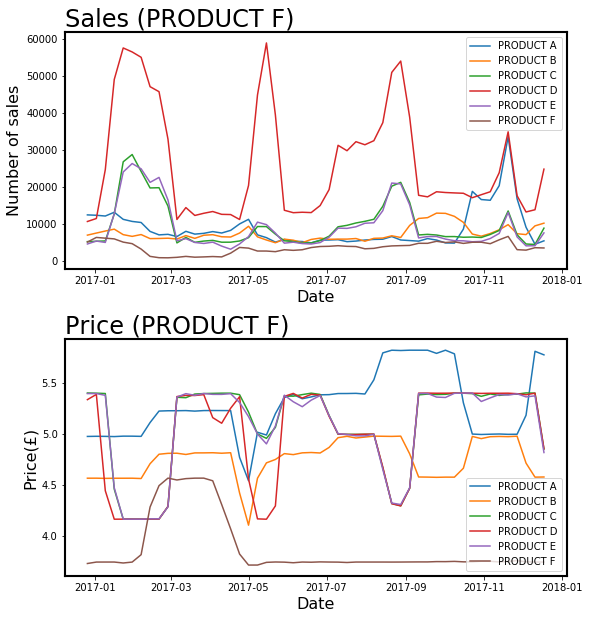

In [10]:
product = "PRODUCT A"
products = ["PRODUCT A","PRODUCT B","PRODUCT C","PRODUCT D","PRODUCT E","PRODUCT F"]

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(9,10))
plt.subplots_adjust(hspace = 0.3)

for product in products:
    ax1.plot(sales_df_T.Date, sales_df_T[product],label=product)
    ax2.plot(price_df_T.Date, price_df_T[product],label=product)
    
#ax1.plot(sales_df_T.Date, sales_df_T['PRODUCT B'])
ax1.set_title("Sales (" + product+")",fontsize=24, loc='left')
ax1.set_xlabel("Date",fontsize=16)
ax1.set_ylabel("Number of sales",fontsize=16)
ax1.legend()


ax2.set_title("Price (" + product+")",fontsize=24, loc='left')
ax2.set_xlabel("Date",fontsize=16)
ax2.set_ylabel("Price(£)",fontsize=16)
ax2.legend()

axes = fig.get_axes()
for ax in axes:
    [i.set_linewidth(2.1) for i in ax.spines.values()]
pylab.savefig('./'+product+'.png', bbox_inches=0)

In [11]:
scott = pd.DataFrame()

In [12]:
scott['price'] = price_df_T['PRODUCT A'].round(decimals=2)

In [13]:
scott['sales'] = sales_df_T['PRODUCT A']

In [14]:
scott2 = scott.groupby(['price']).sum()
scott2.head(15)

,sales
price,
4.54,11202.53
4.77,9955.14
4.98,82065.69
4.99,6253.85
5.00,122174.10
5.02,7000.02
5.11,7935.20
5.18,9056.94
5.20,5048.77


In [15]:
scott3 = pd.DataFrame()
scott3['price'] = price_df_T['PRODUCT AA'].round(decimals=2)
scott3['sales'] = sales_df_T['PRODUCT AA']
scott4 = scott3.groupby(['price']).mean()
scott4.head(3)

,sales
price,
5.15,2110.00
5.45,1760.56
5.64,1128.17


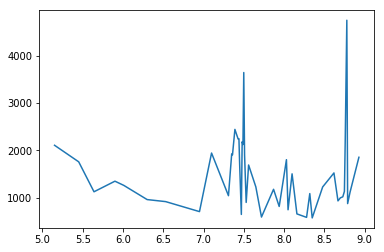

In [16]:
plt.plot(scott4.index, scott4.sales)

In [17]:
scott3.head(60)

,price,sales
0,8.32,1089.74
1,8.67,935.82
2,8.48,1230.24
3,8.62,1525.75
4,8.70,1000.28
5,8.73,1099.98
6,8.73,942.85
7,8.79,878.66
8,8.76,1279.12
9,8.75,1137.02


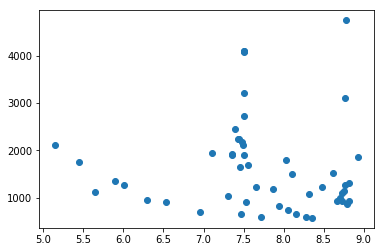

In [18]:
plt.scatter(scott3.price, scott3.sales)

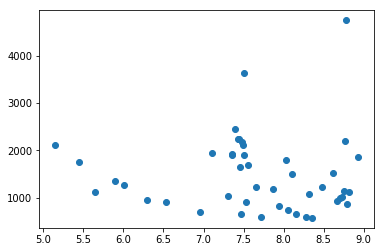

In [19]:
plt.scatter(scott4.index, scott4.sales)

In [20]:
len(scott3)

52

Coefficients: 
 [-64.0123212]


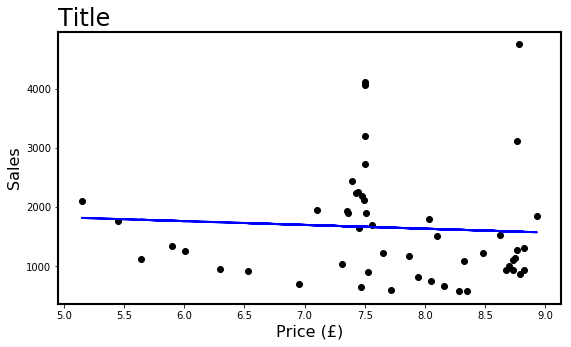

In [21]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = scott3.price.values.reshape(-1,1)
y = scott3.sales

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X,y)

# Make predictions using the testing set
y_pred = regr.predict(X)

## The coefficients
print('Coefficients: \n', regr.coef_)


# Plot outputs
fig,(ax1) = plt.subplots(1,1,figsize=(9,5))

ax1.scatter(X,y,  color='black')
ax1.plot(X, y_pred, color='blue', linewidth=2)

ax1.set_title("Title",fontsize=24, loc='left')
ax1.set_xlabel("Price (£)",fontsize=16)
ax1.set_ylabel("Sales",fontsize=16)

axes = fig.get_axes()
for ax in axes:
    [i.set_linewidth(2.1) for i in ax.spines.values()]

plt.show()







  
#pylab.savefig('./'+product+'.png', bbox_inches=0)

In [22]:
import scipy


In [40]:
def linear_reg(X,y):
    
    temp_df = pd.DataFrame()
    temp_df['X'] = X
    temp_df['y'] = y
    temp_df = temp_df.dropna()
    
    

    #temp_df.X = temp_df.X.values.reshape(-1,1)
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(temp_df.X.values.reshape(-1,1),temp_df.y)
    
    # Make predictions using the testing set
    y_pred = regr.predict(temp_df.X.values.reshape(-1,1))
    
    # Plot outputs
    fig,(ax1) = plt.subplots(1,1,figsize=(9,5))

    ax1.scatter(temp_df.X,temp_df.y,  color='black')
    ax1.plot(temp_df.X, y_pred, color='blue', linewidth=2)

    #ax1.set_title("Title",fontsize=24, loc='left')
    ax1.set_xlabel("Price (£)",fontsize=16)
    ax1.set_ylabel("Sales",fontsize=16)

    axes = fig.get_axes()
    for ax in axes:
        [i.set_linewidth(2.1) for i in ax.spines.values()]

    #plt.show()
    
    #plt.xticks(())
    #plt.yticks(())
    
    return (scipy.stats.pearsonr(temp_df.X,temp_df.y)[0])
    #plt.show()

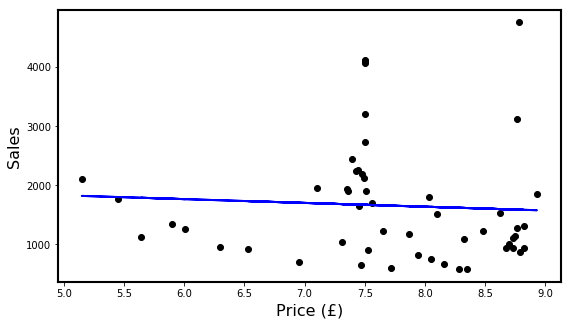

-0.060161769170407518

In [24]:
linear_reg(scott3.price,scott3.sales)

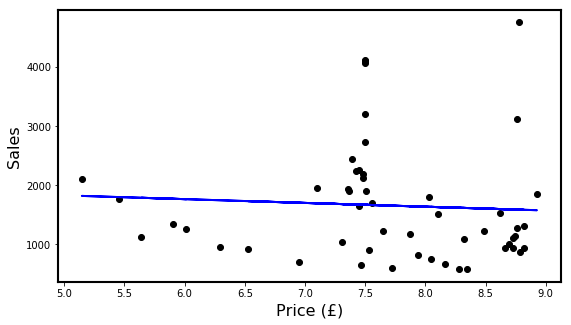

-0.060013983490064898

In [25]:
linear_reg(price_df_T['PRODUCT AA'],sales_df_T['PRODUCT AA'])

0.5901510794308964

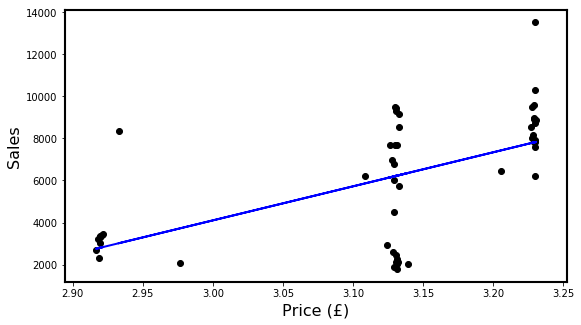

In [44]:
linear_reg(price_df_T['PRODUCT UUUU'],sales_df_T['PRODUCT UUUU'])

c:\users\scott clay\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


PRODUCT UUUU


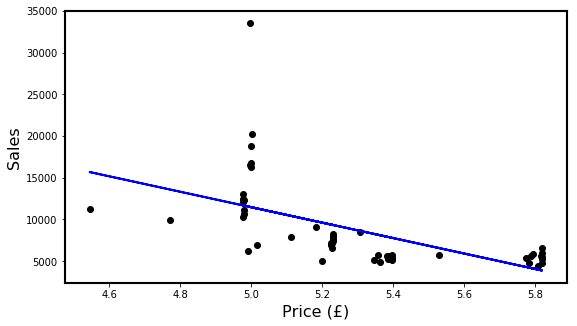

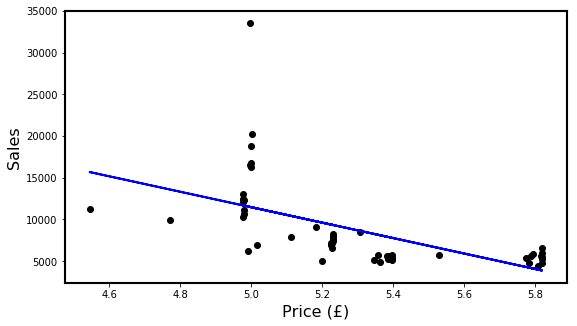

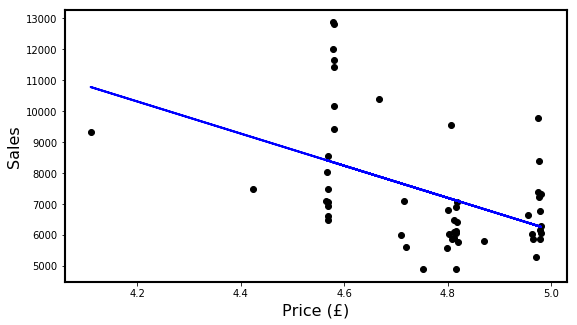

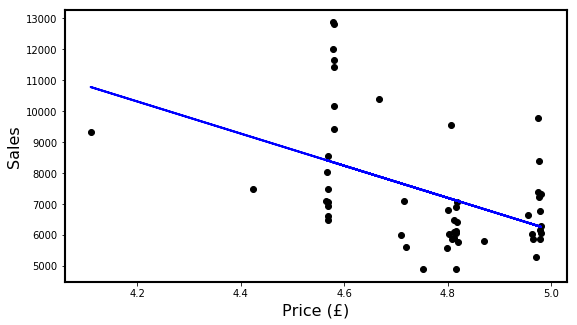

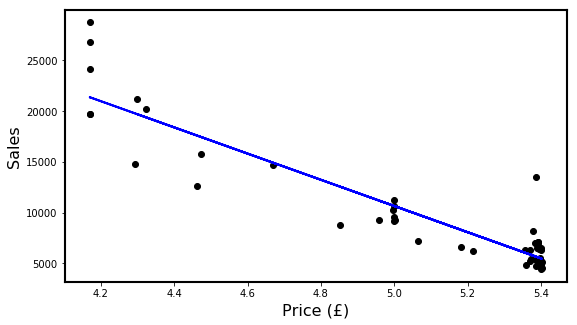

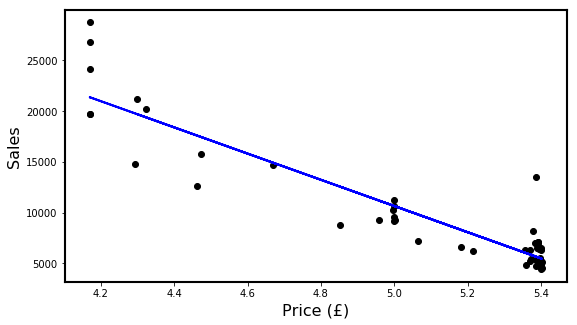

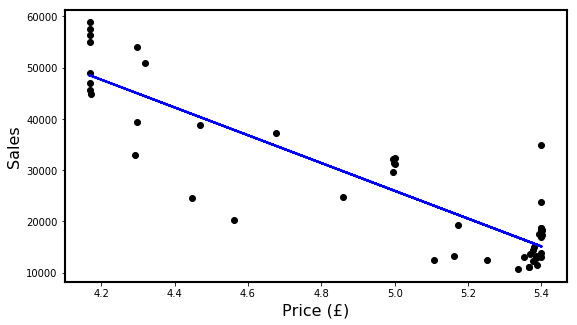

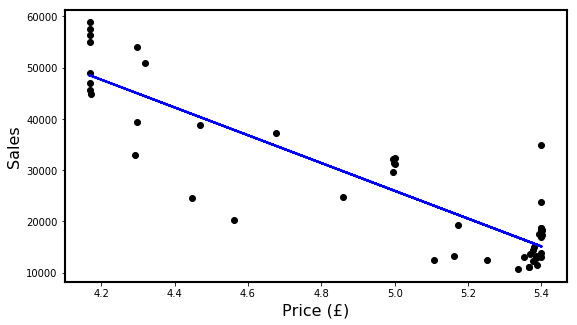

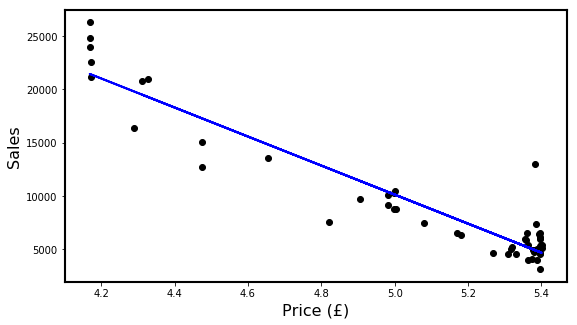

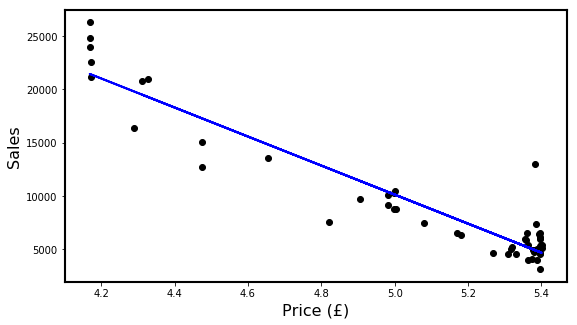

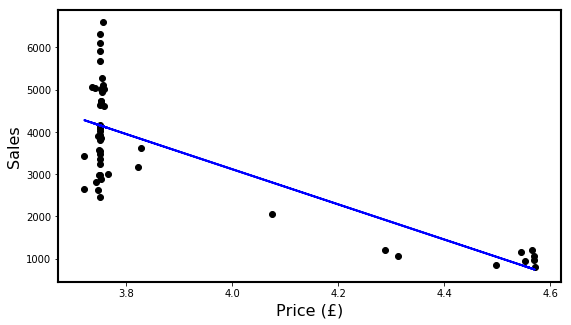

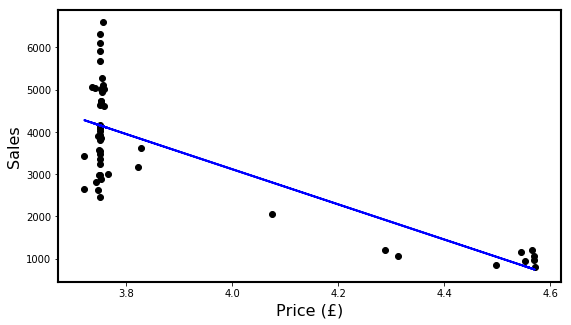

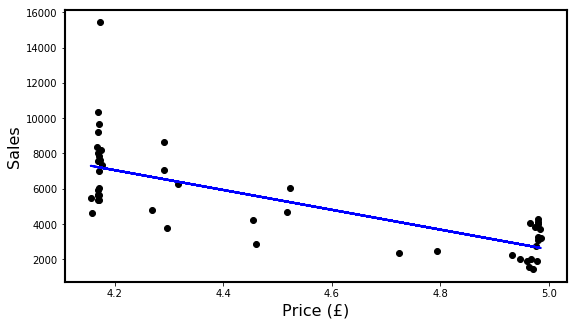

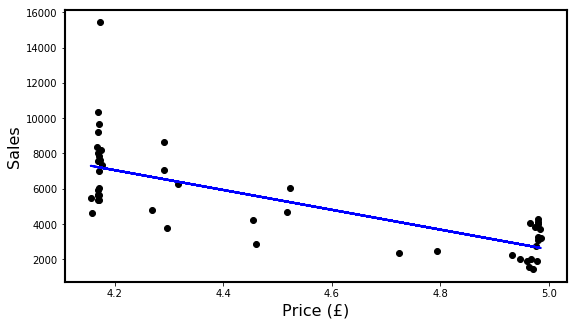

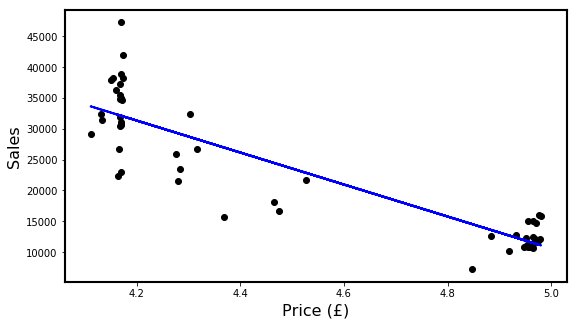

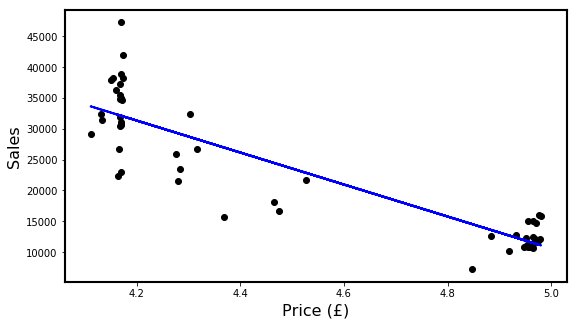

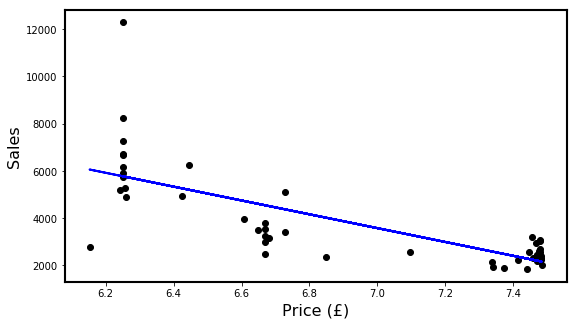

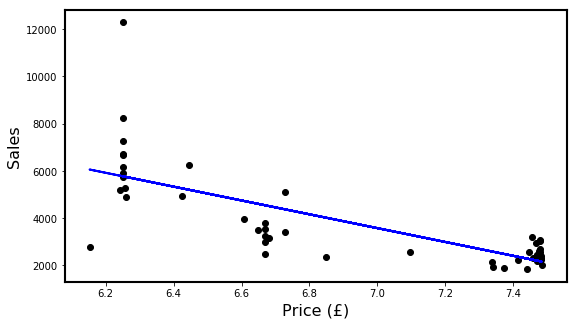

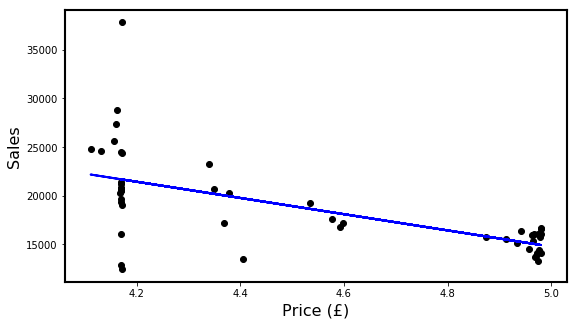

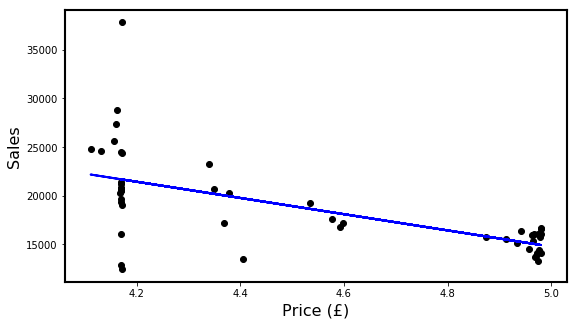

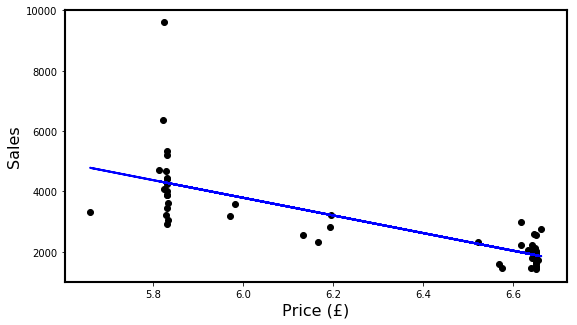

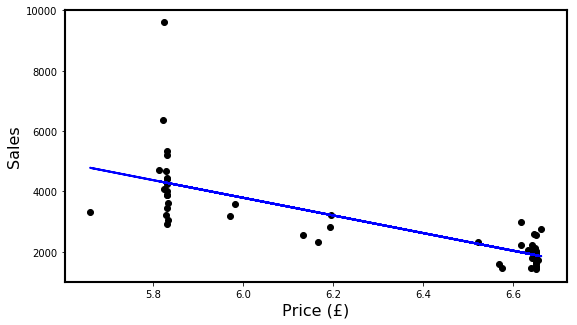

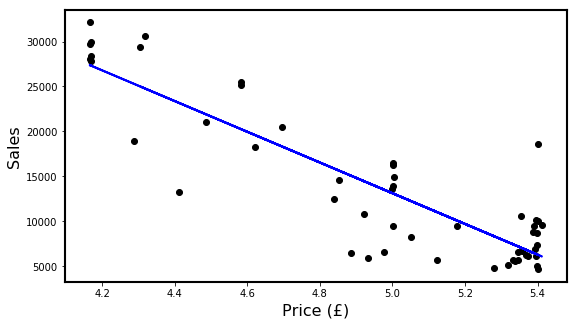

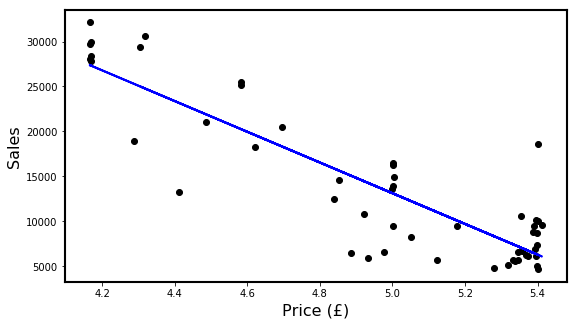

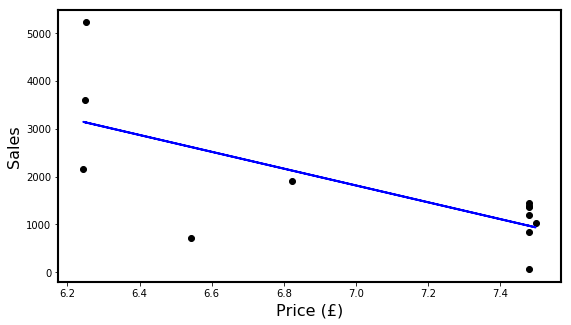

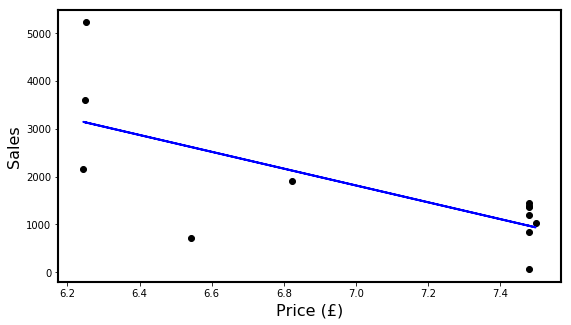

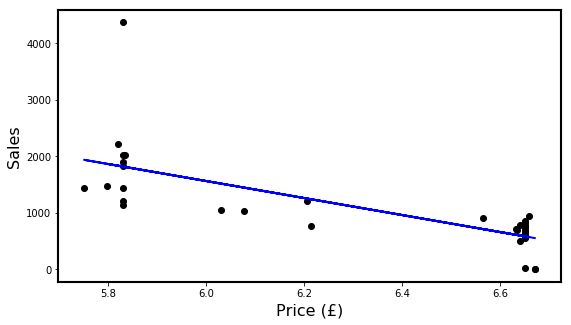

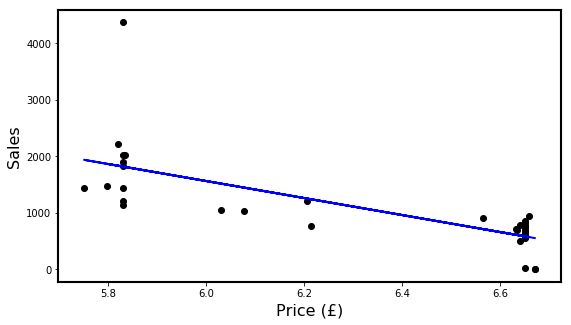

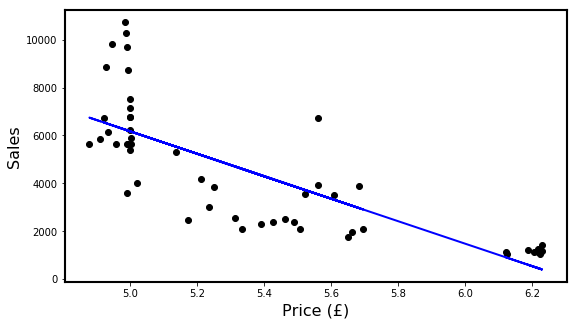

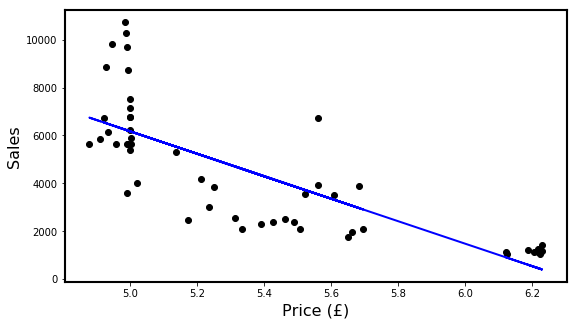

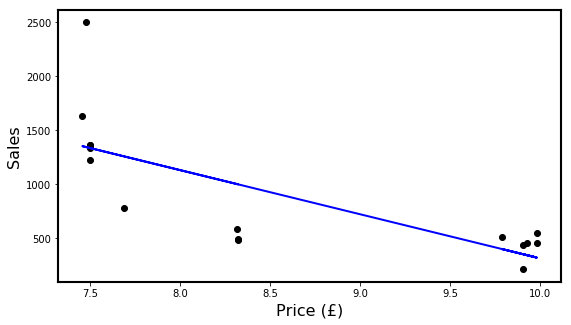

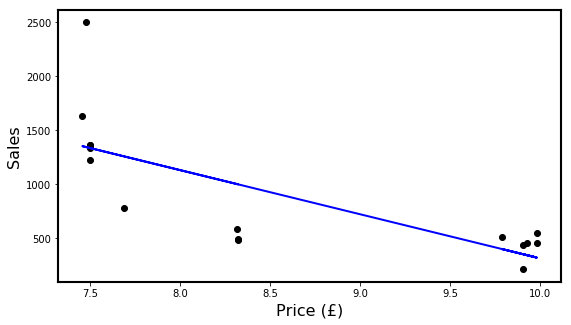

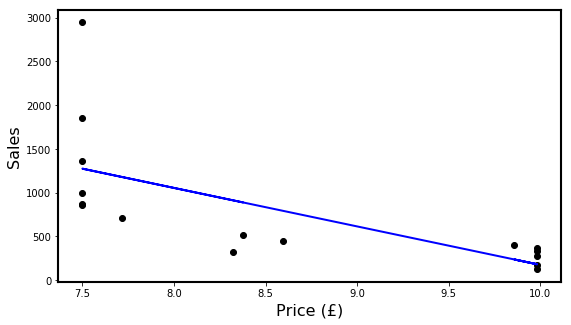

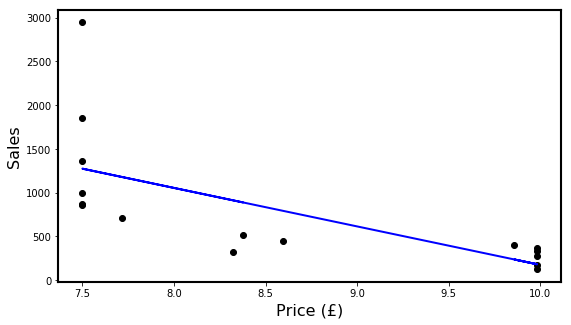

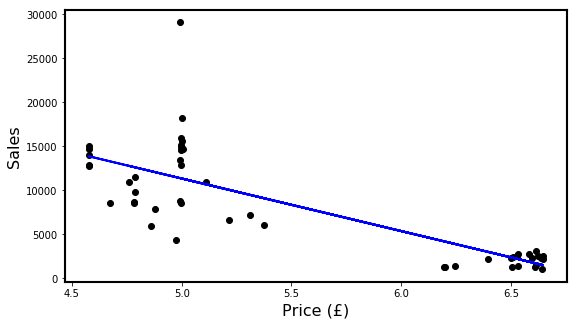

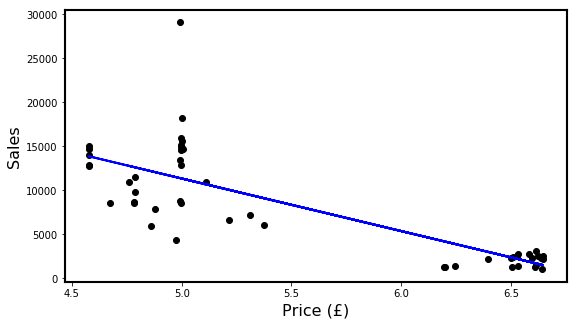

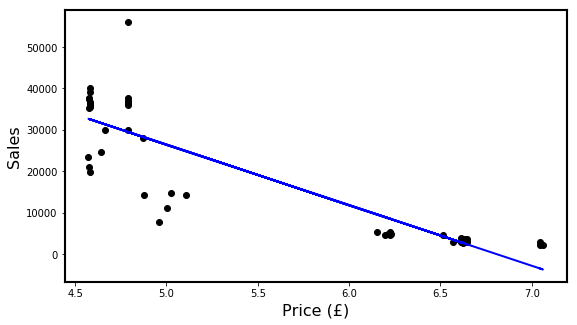

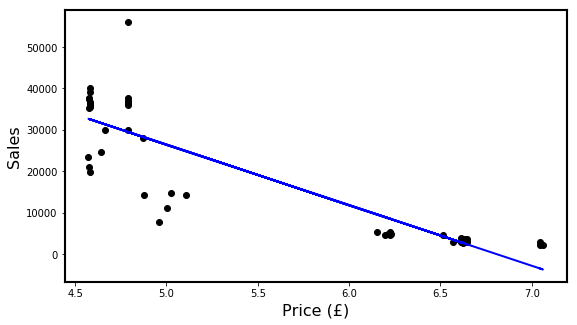

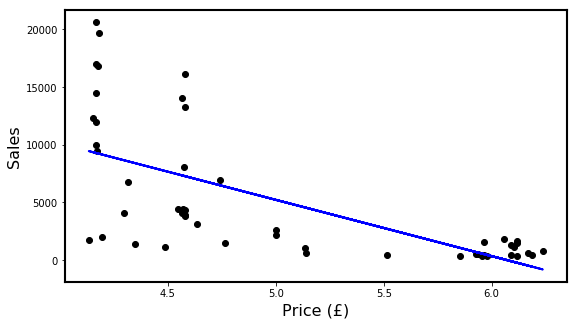

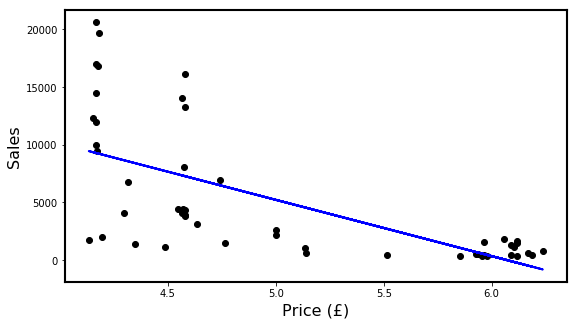

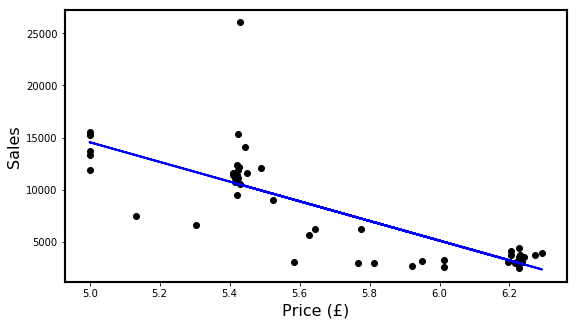

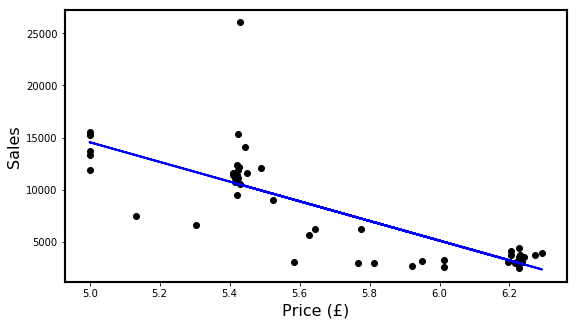

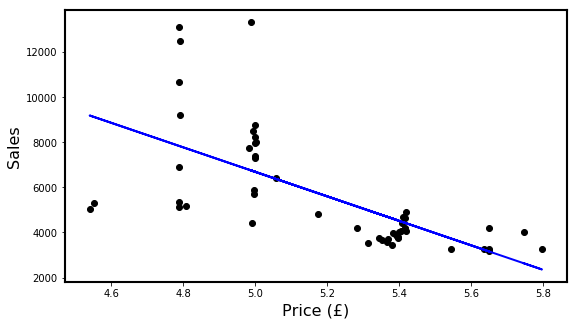

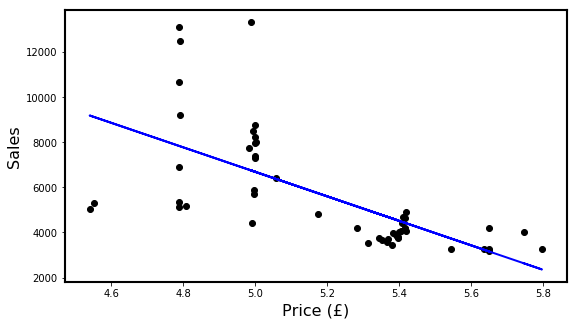

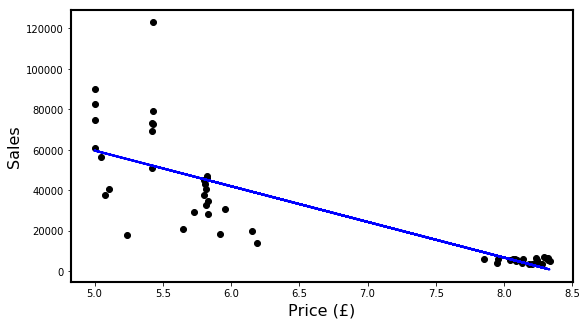

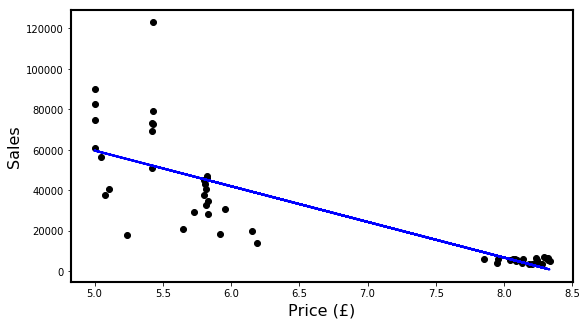

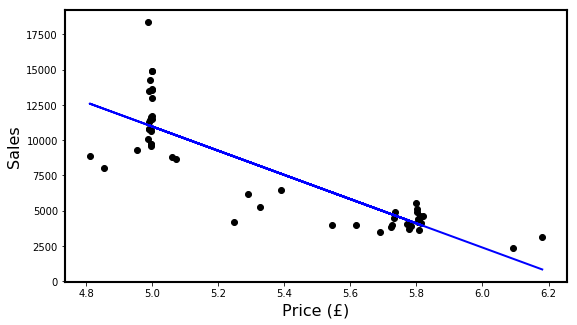

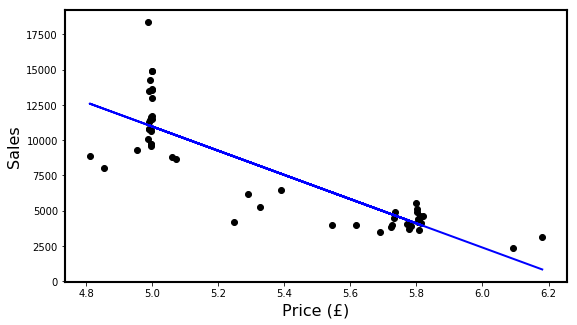

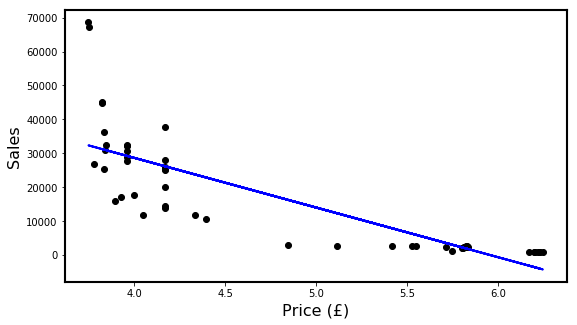

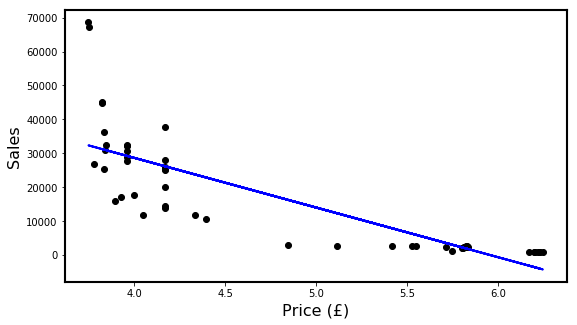

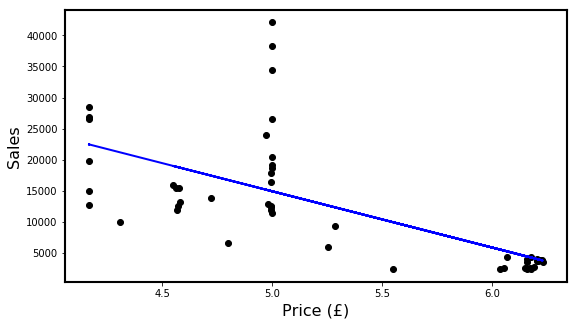

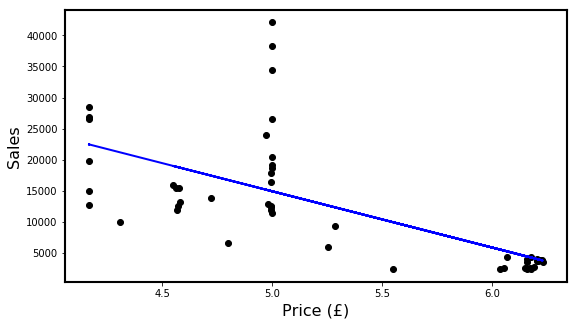

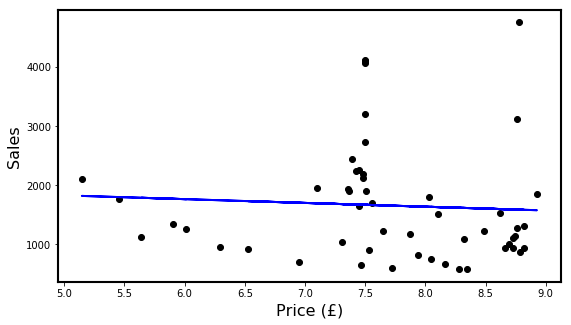

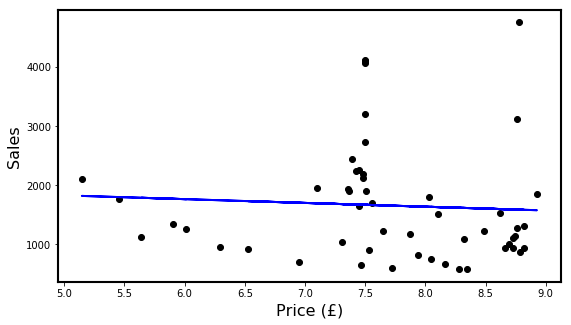

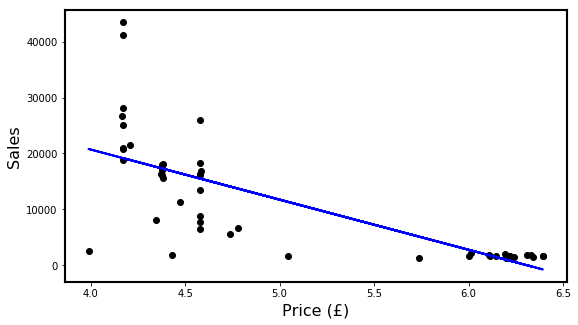

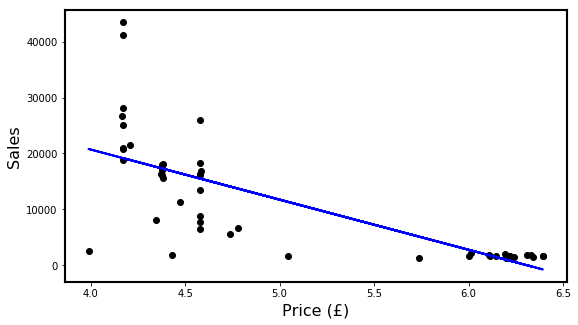

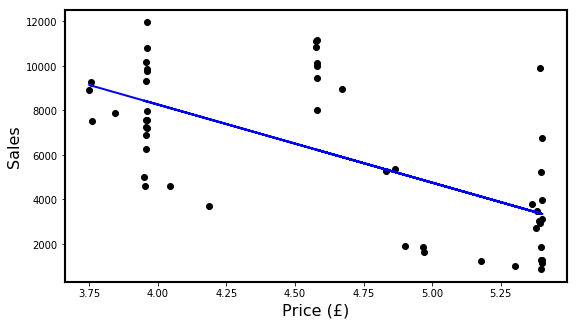

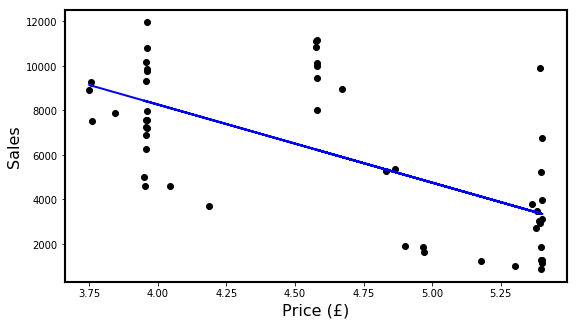

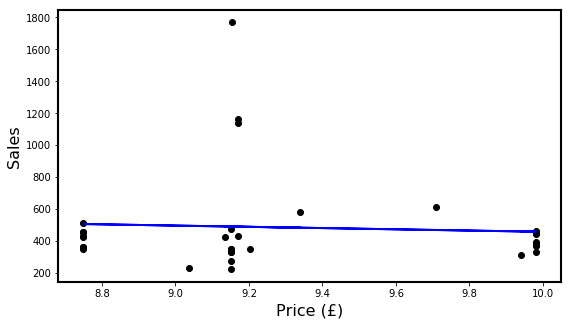

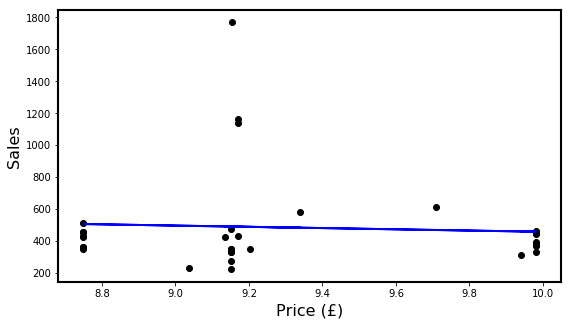

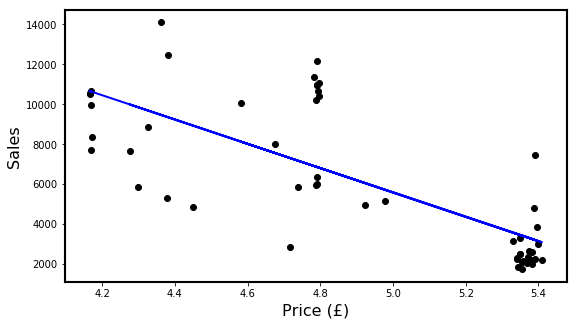

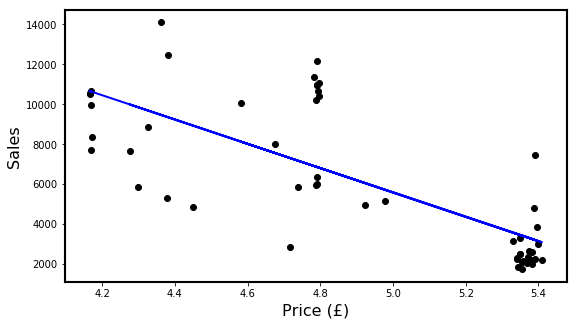

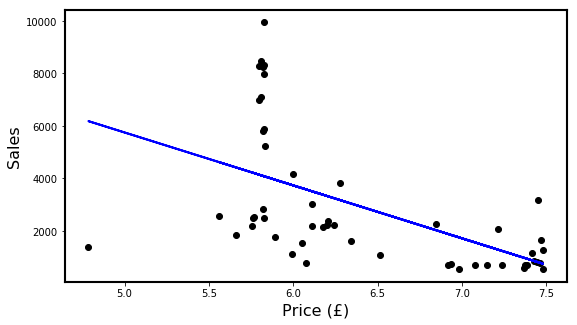

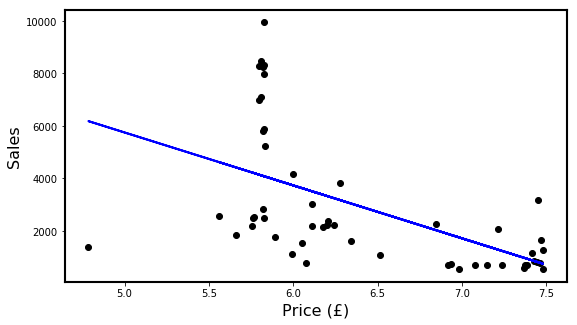

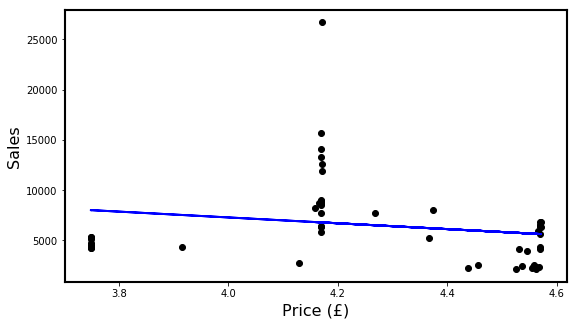

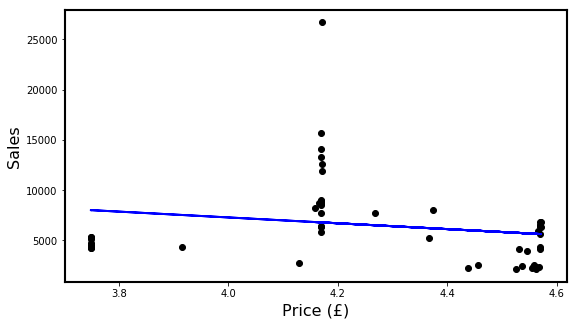

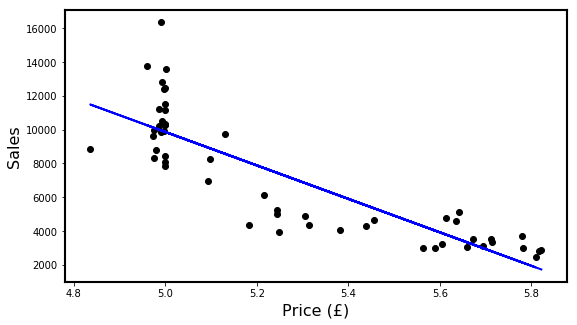

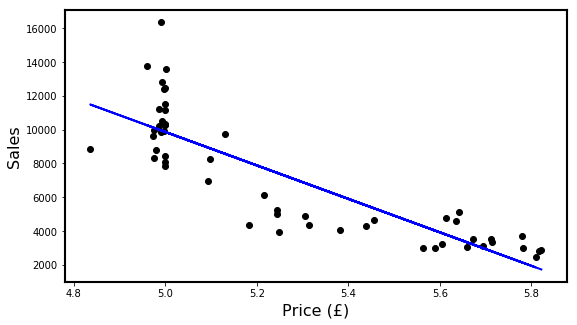

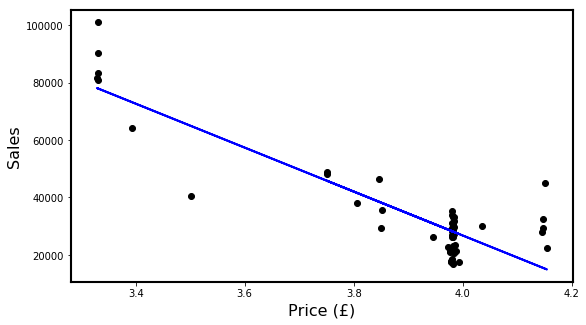

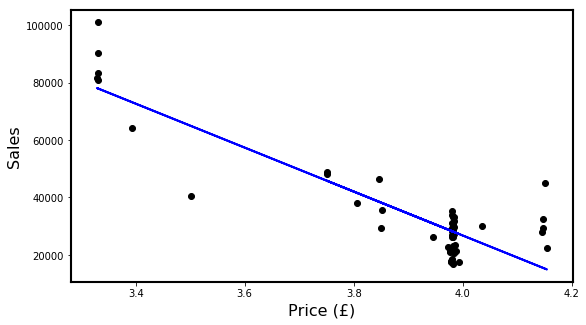

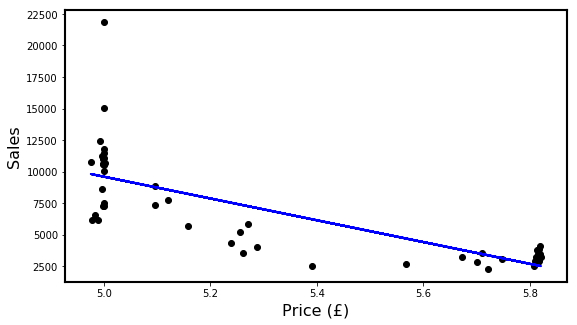

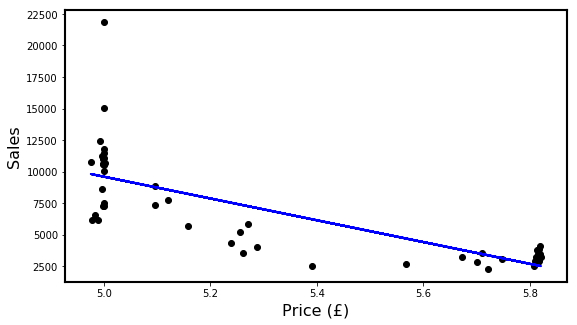

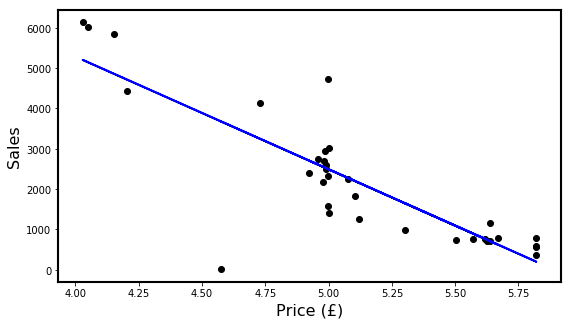

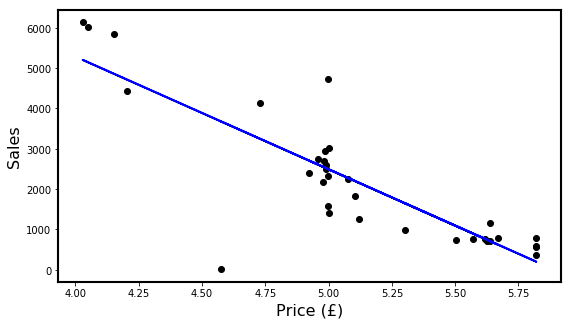

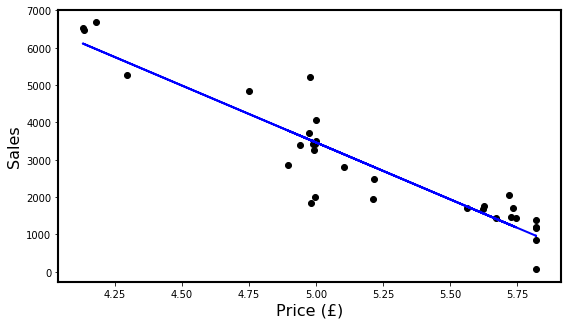

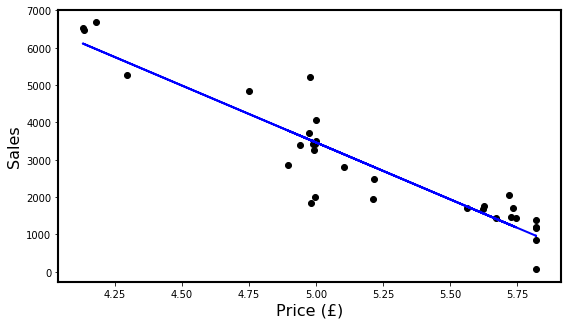

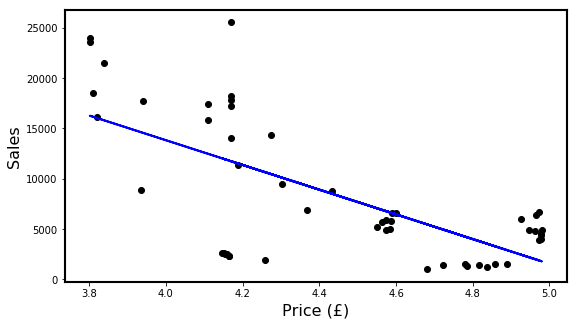

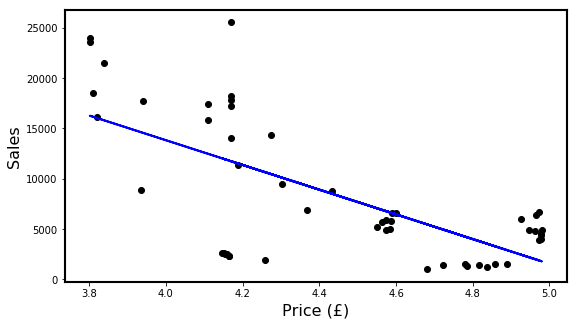

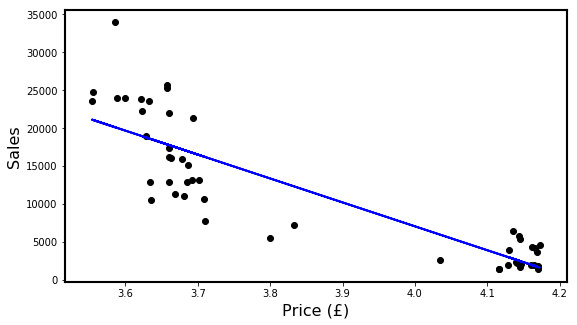

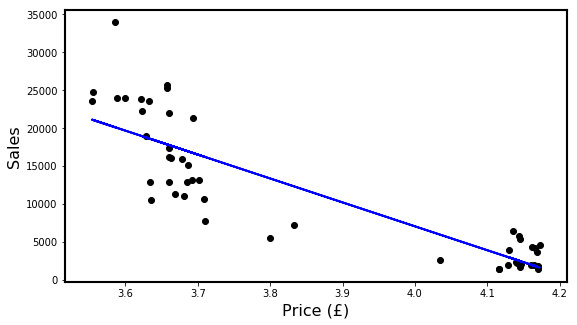

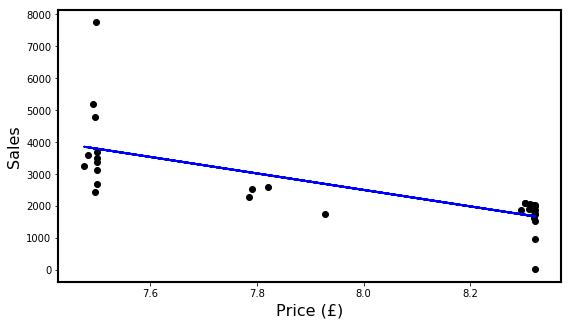

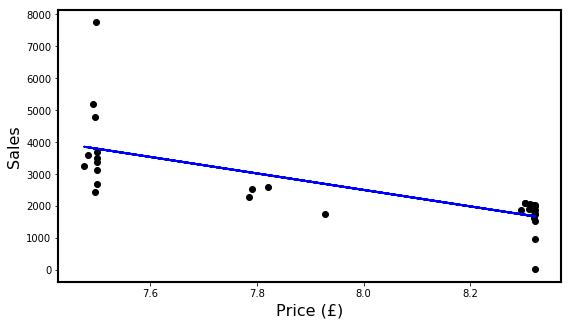

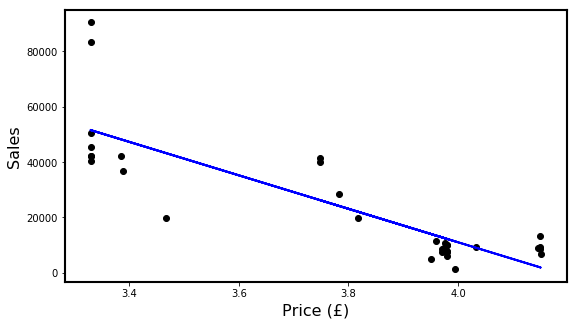

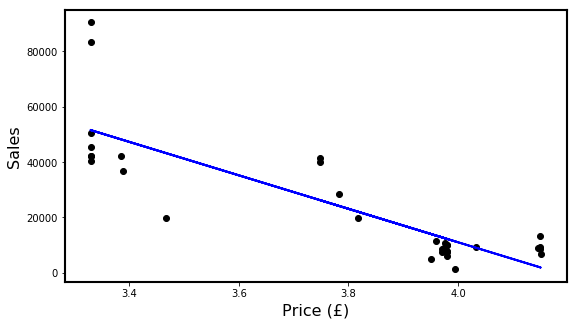

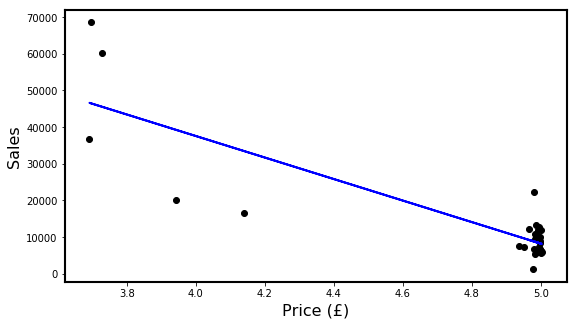

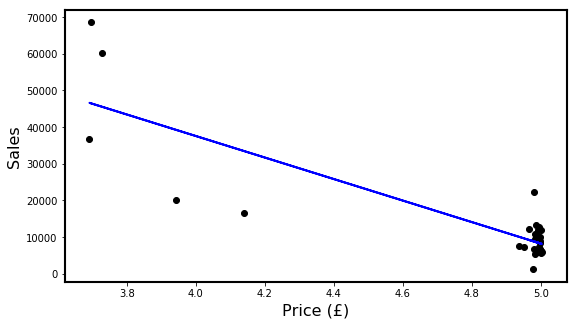

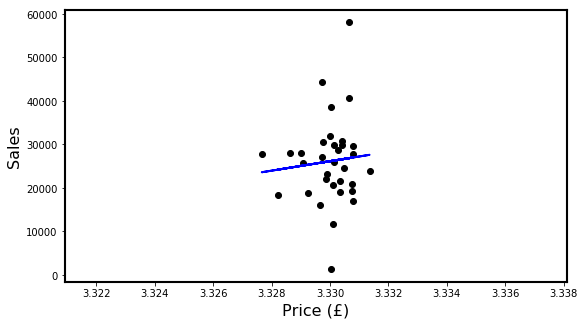

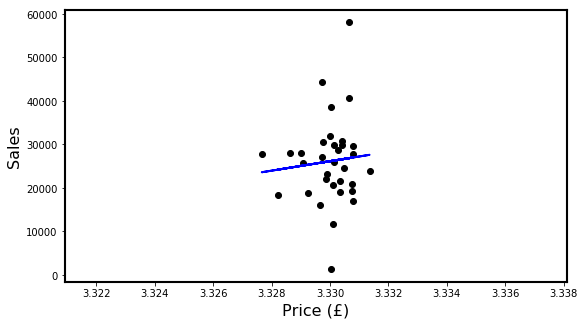

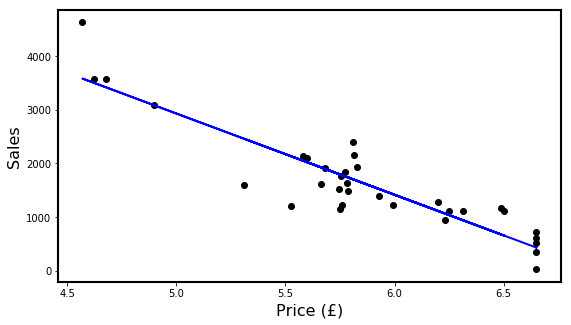

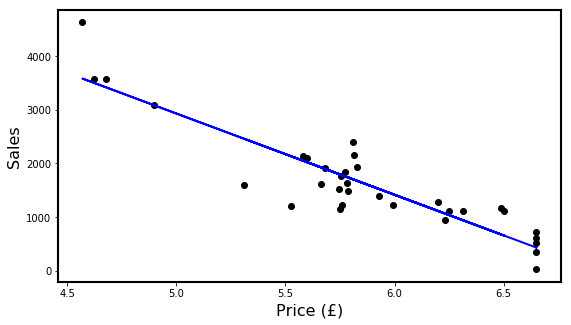

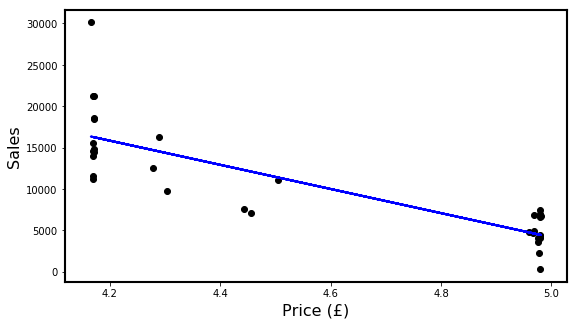

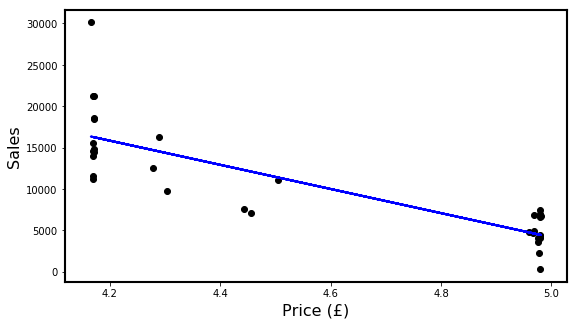

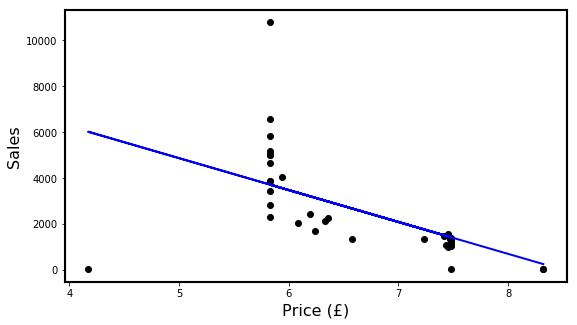

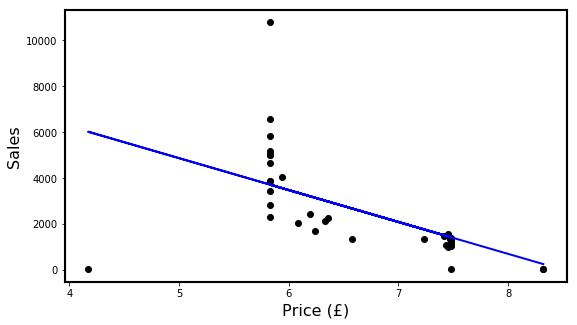

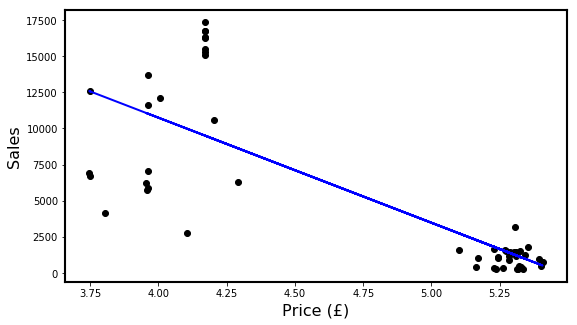

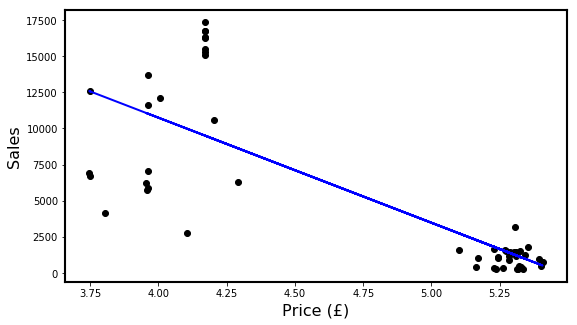

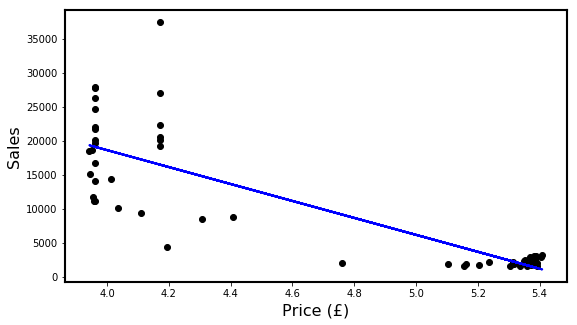

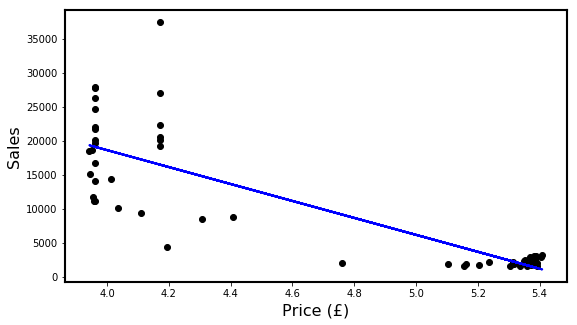

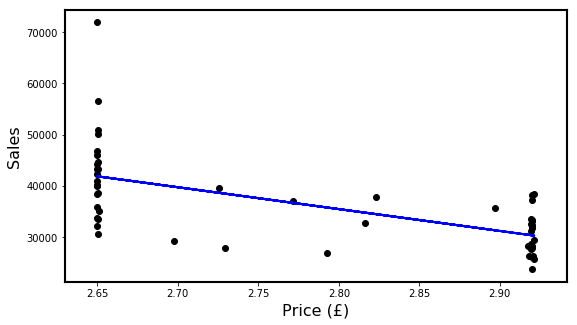

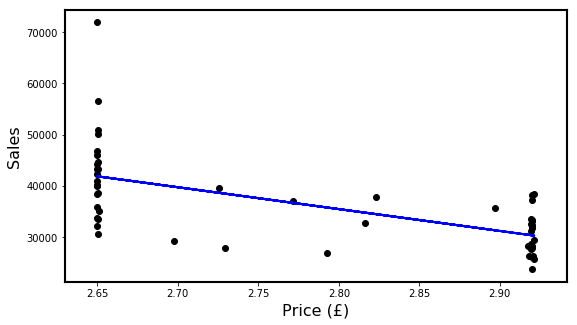

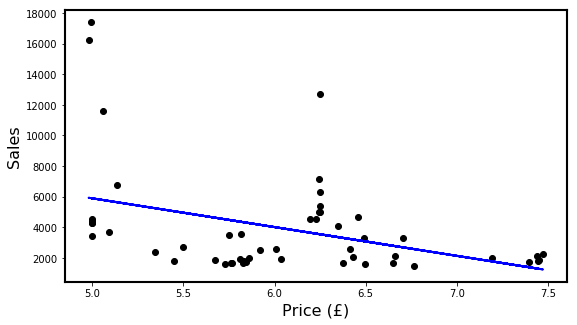

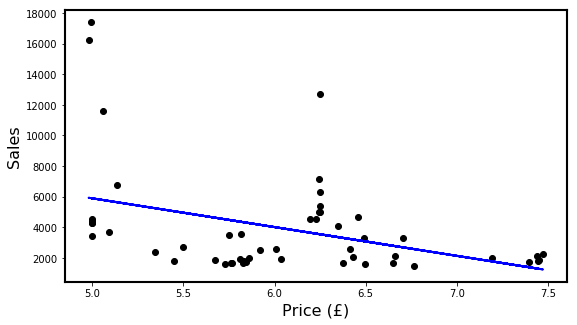

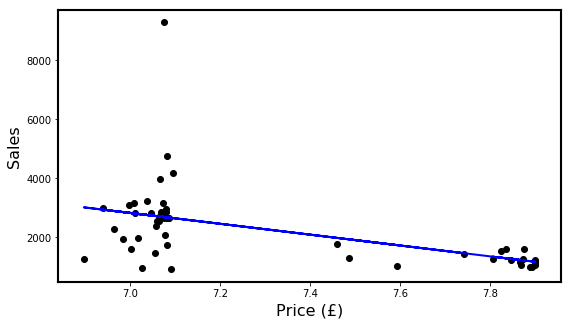

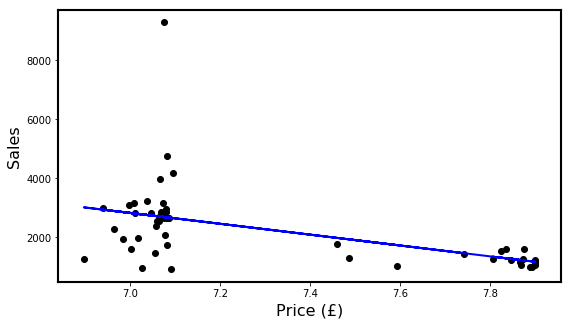

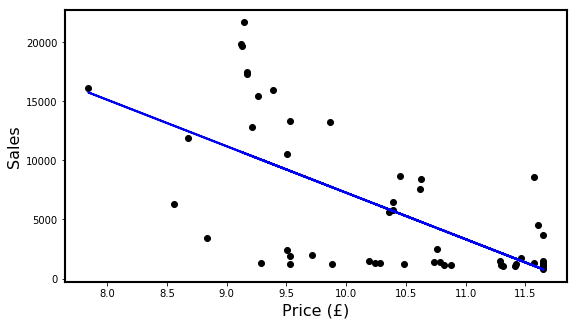

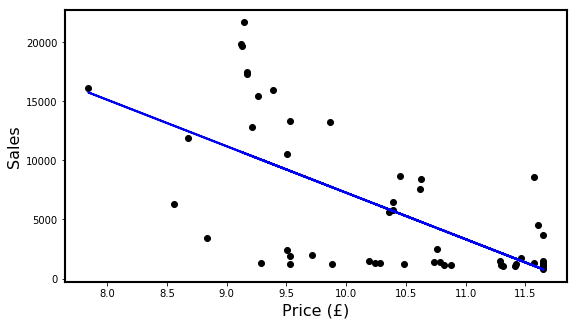

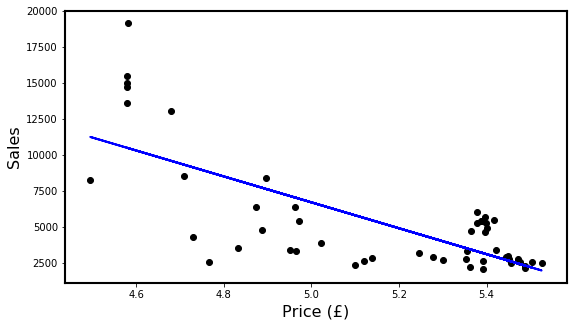

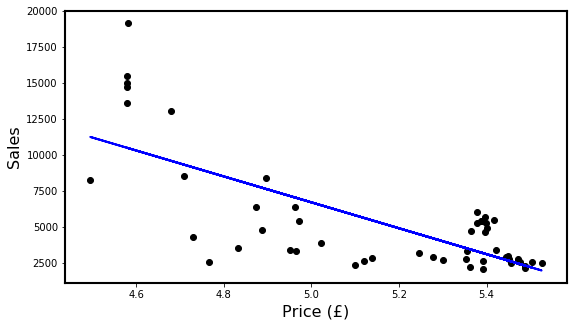

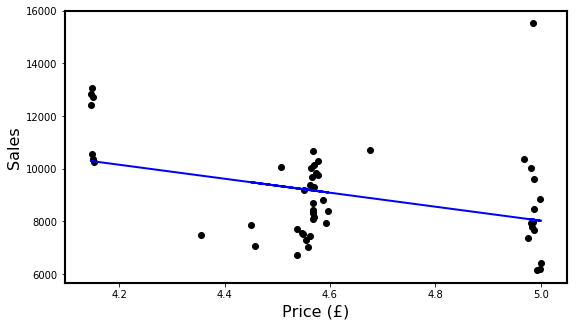

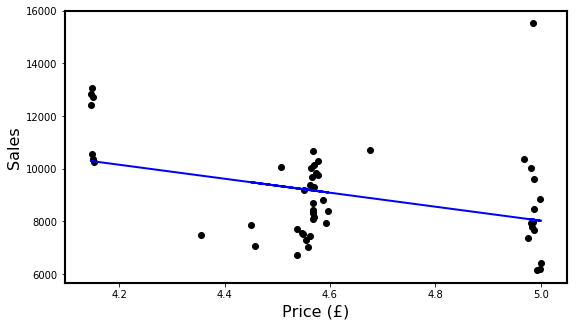

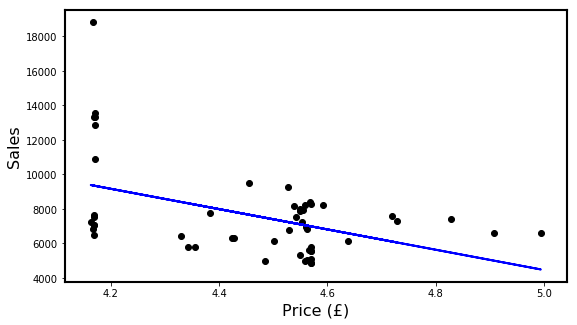

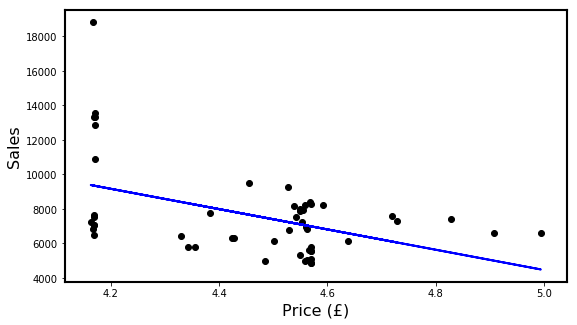

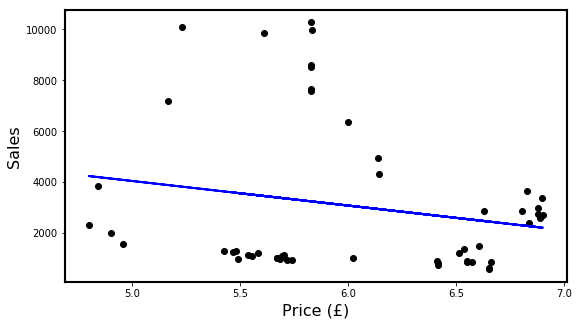

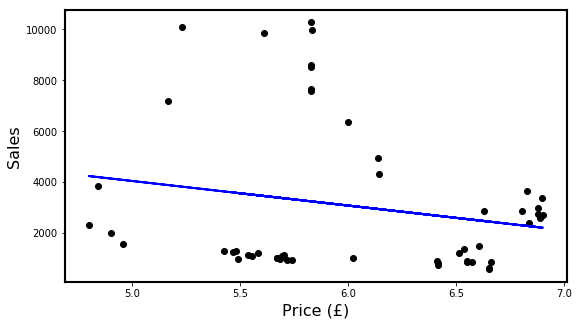

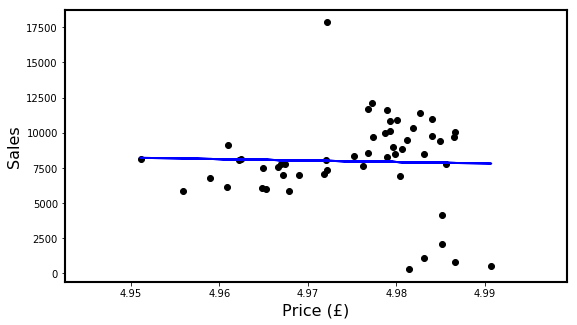

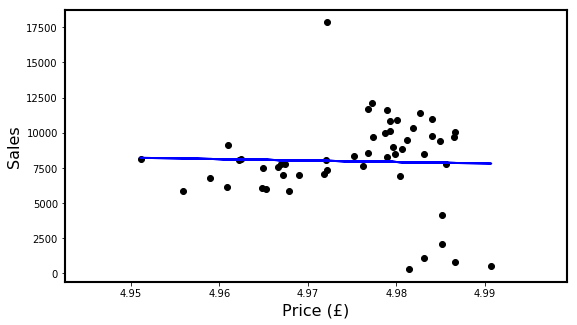

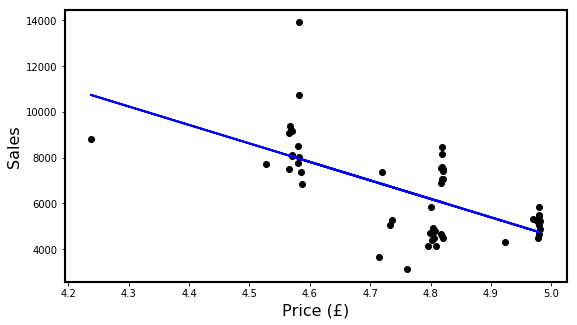

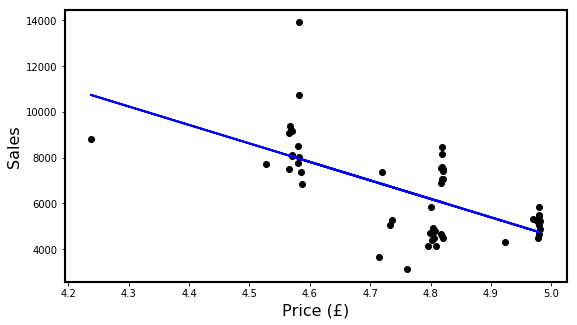

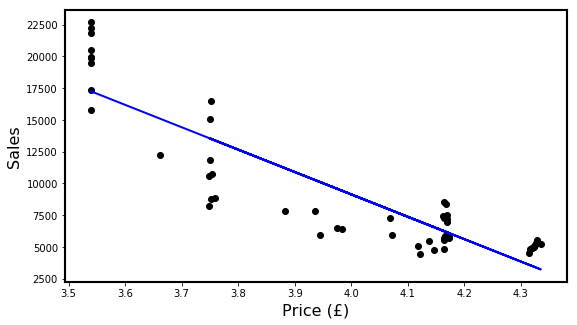

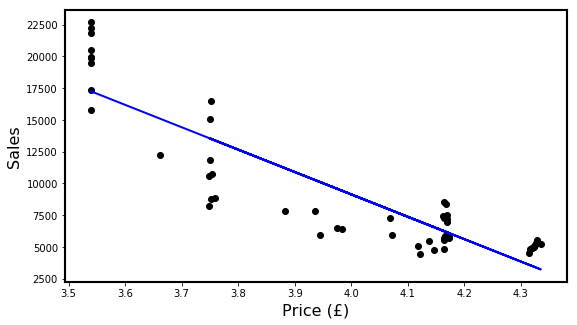

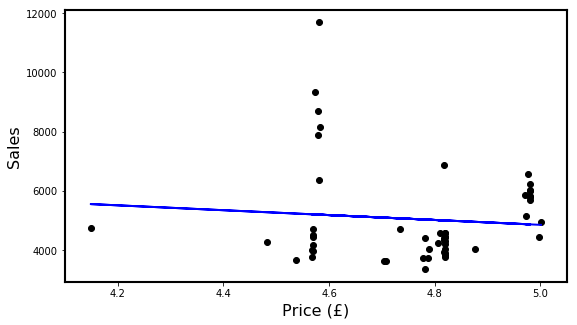

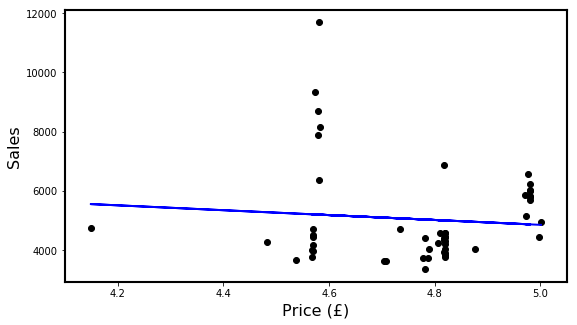

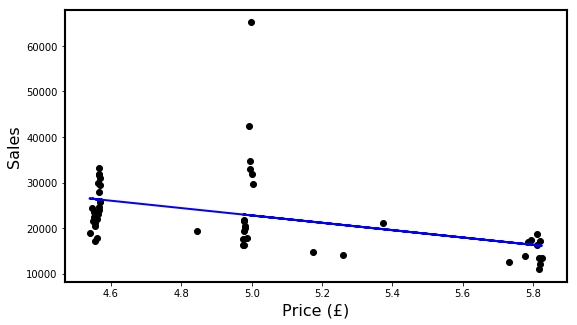

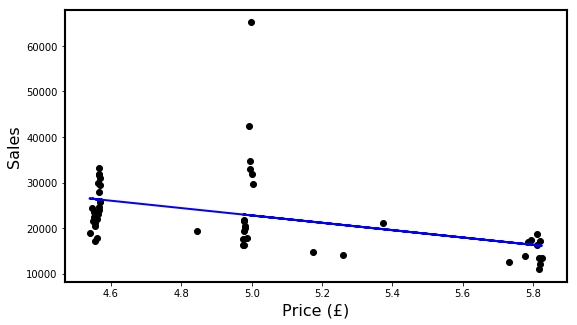

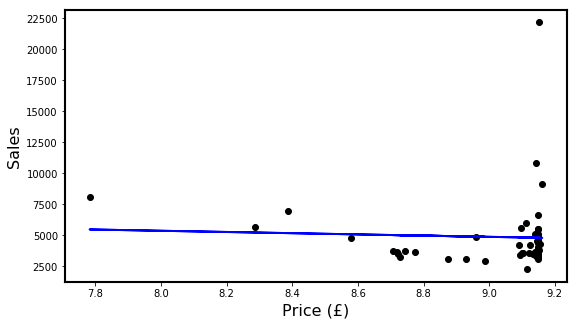

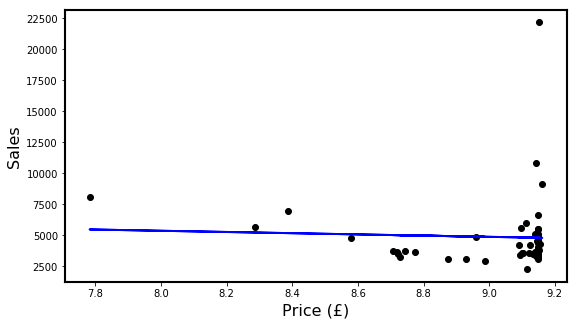

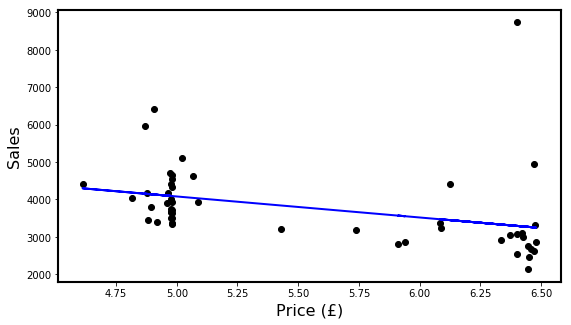

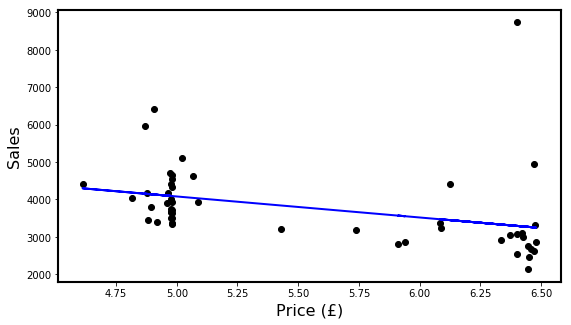

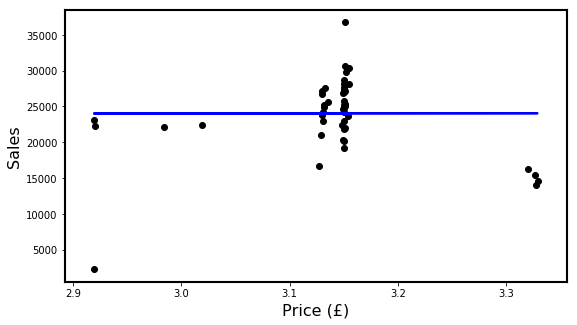

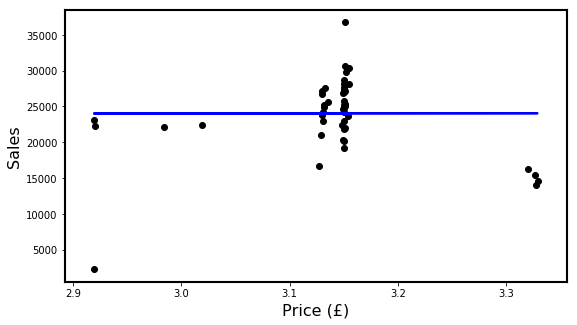

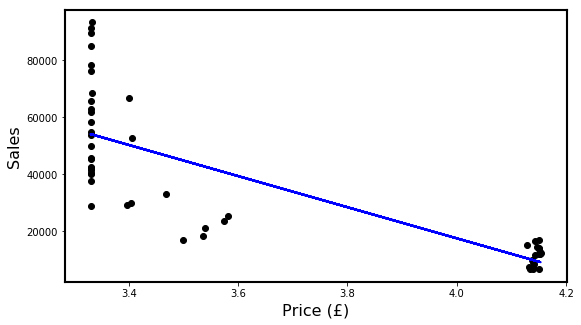

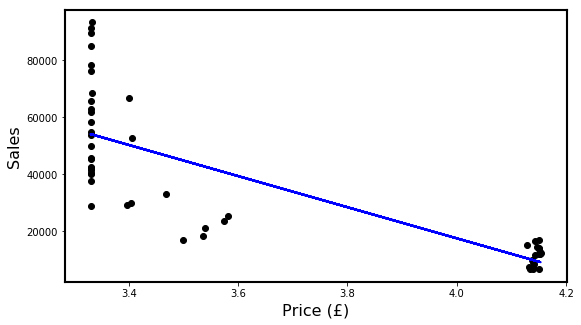

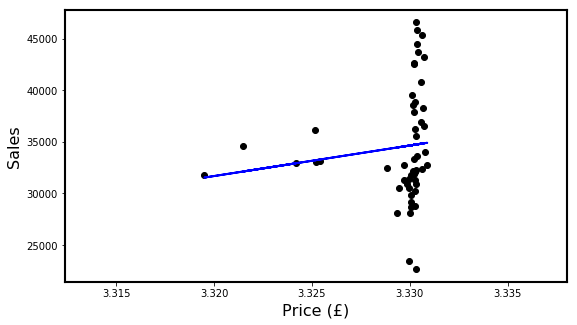

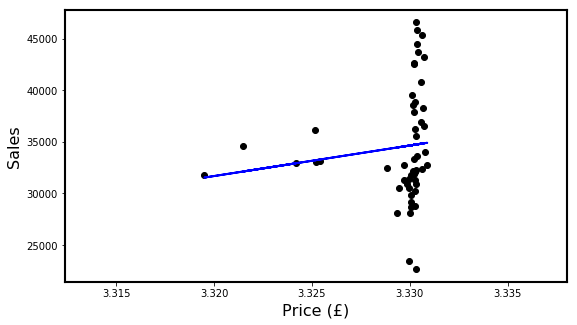

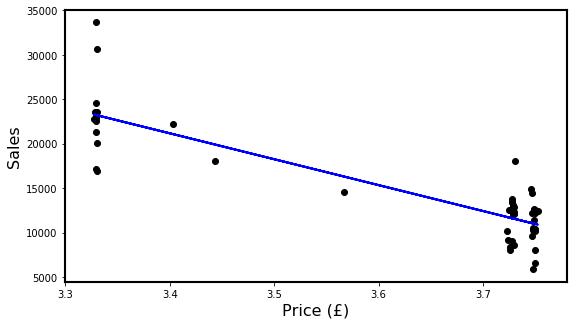

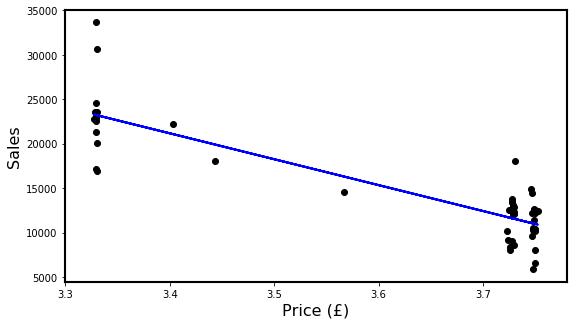

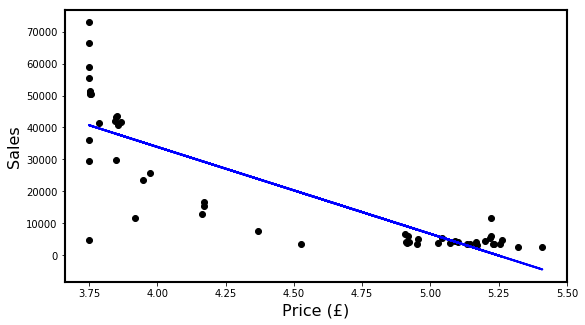

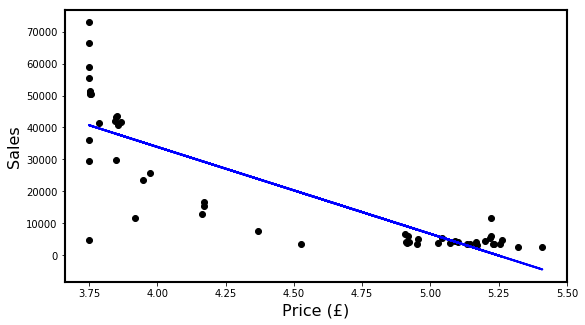

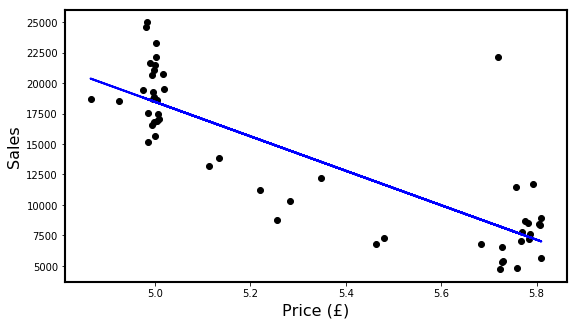

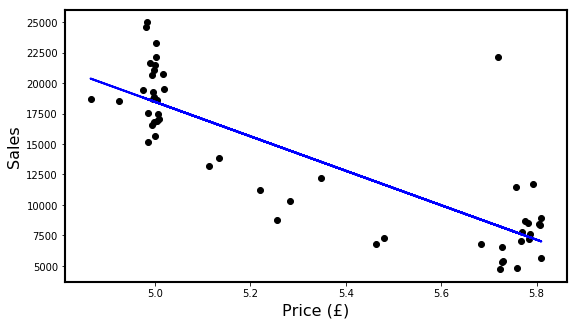

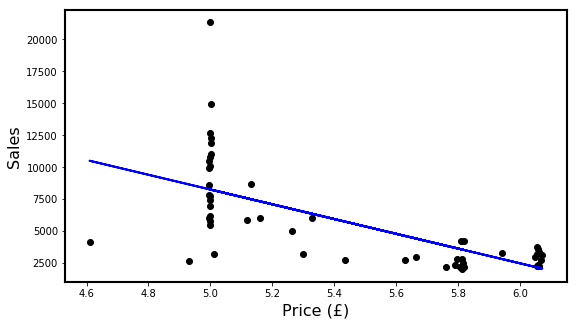

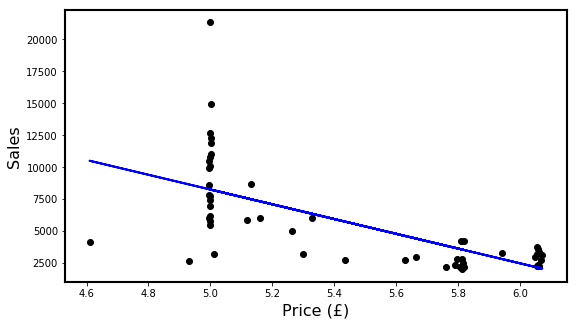

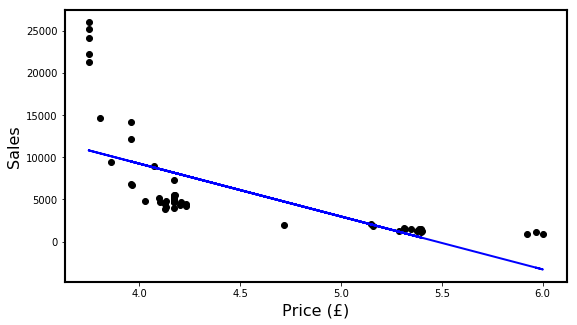

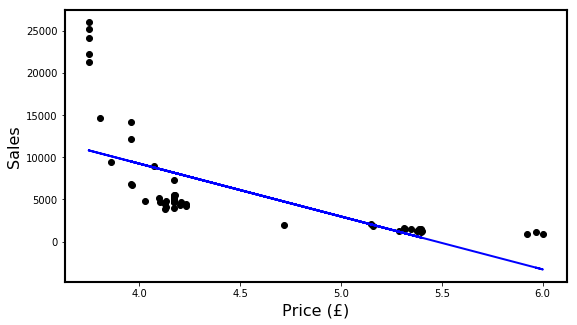

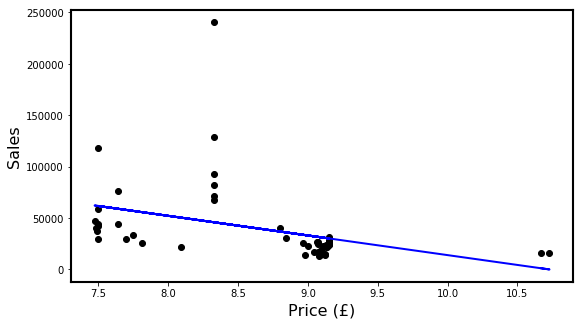

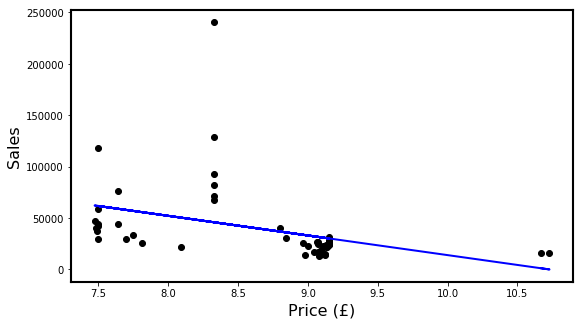

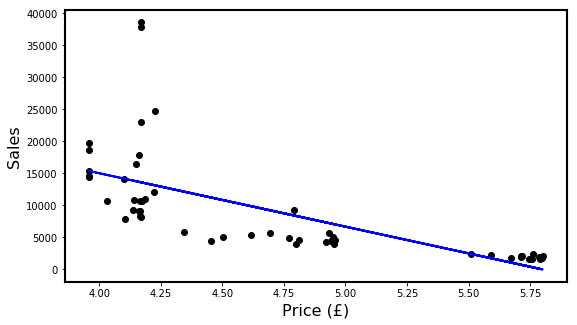

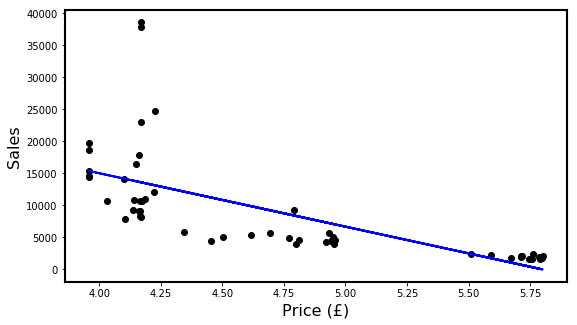

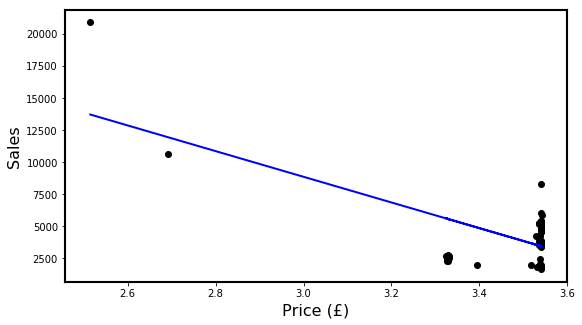

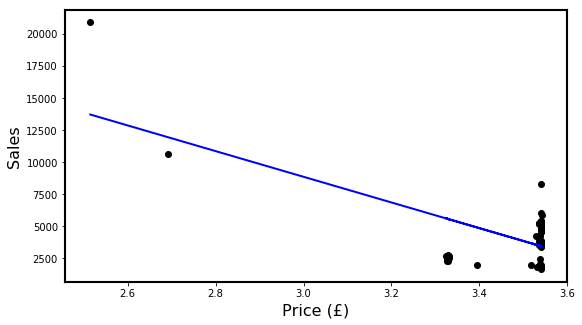

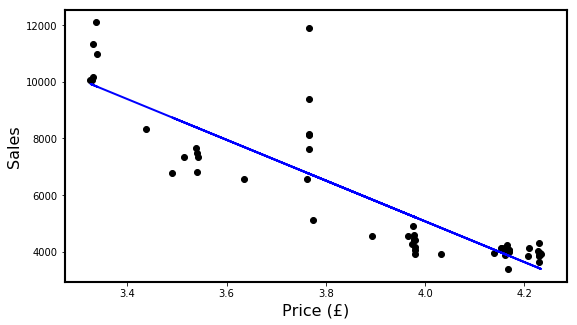

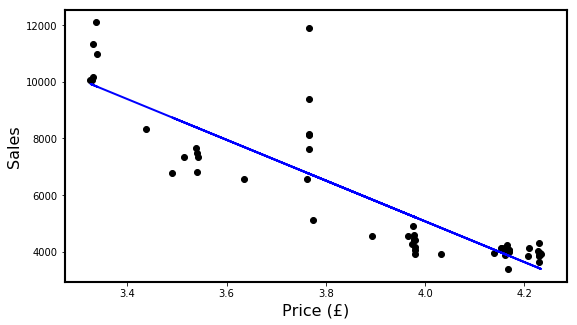

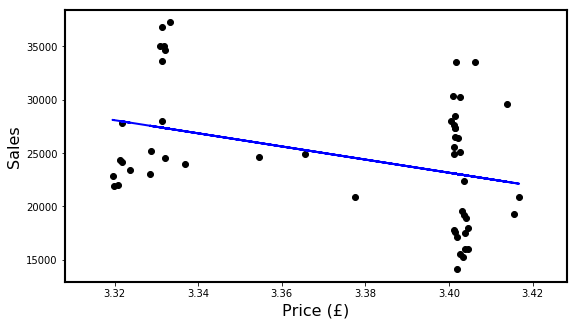

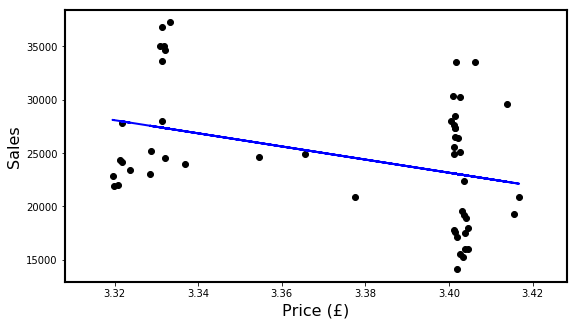

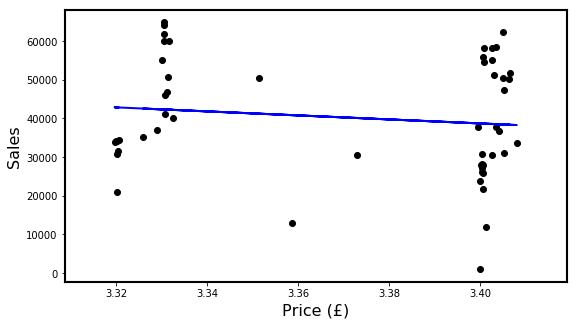

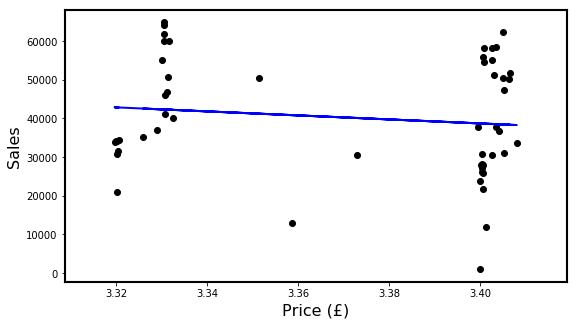

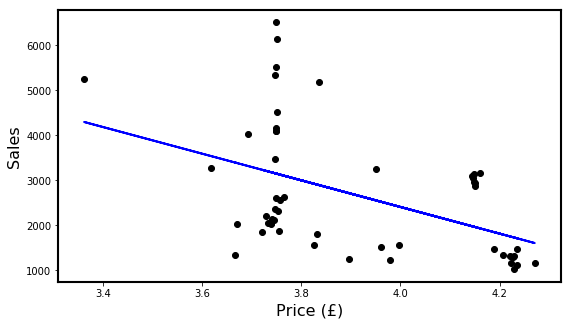

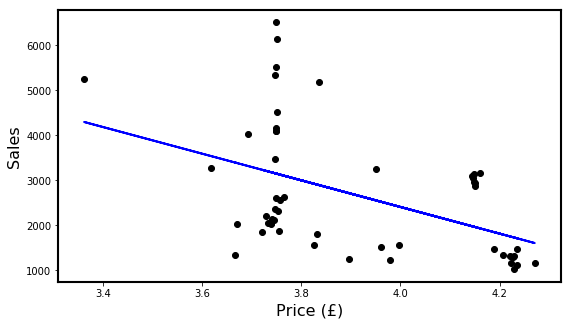

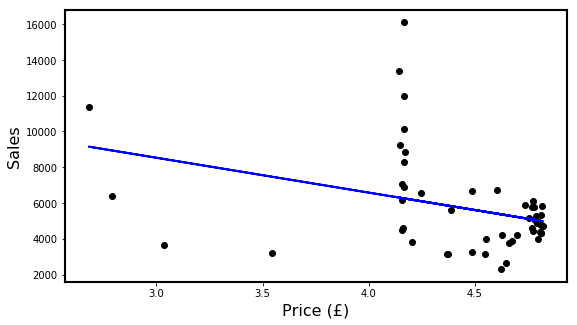

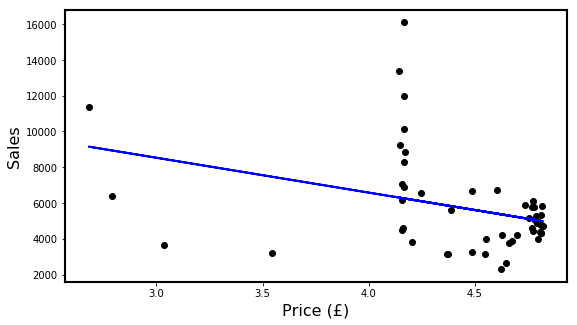

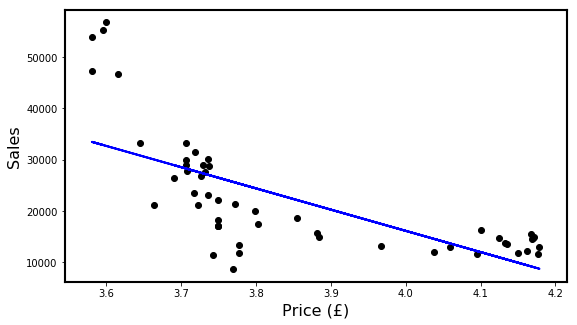

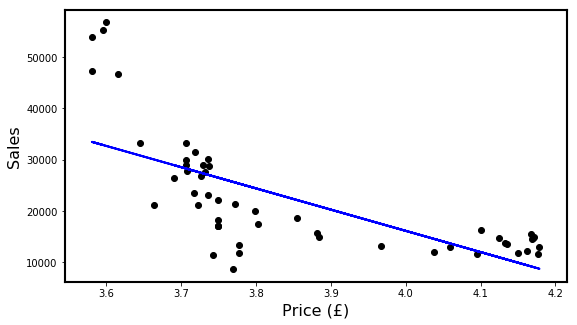

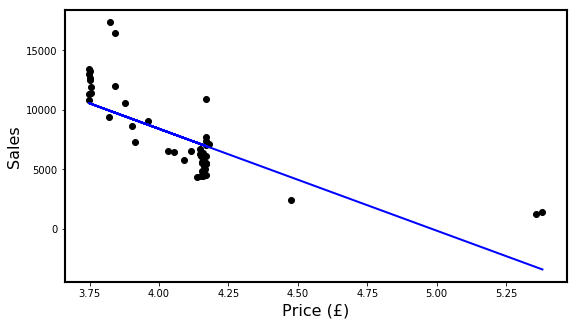

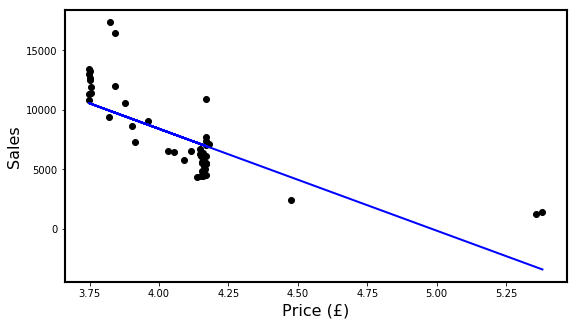

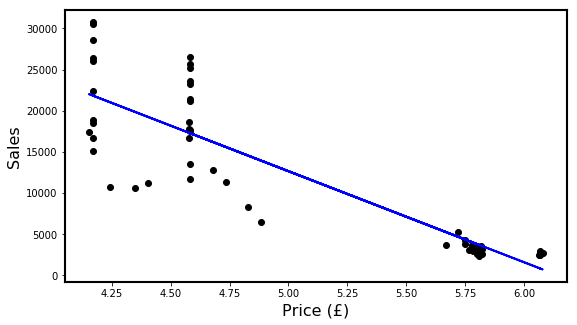

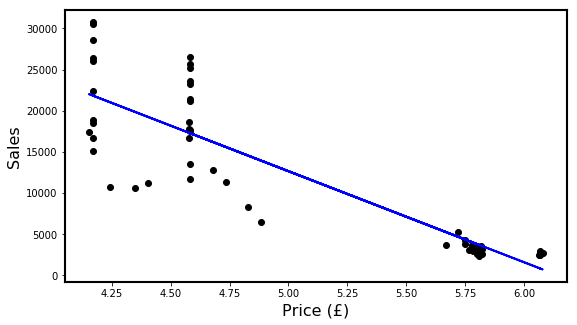

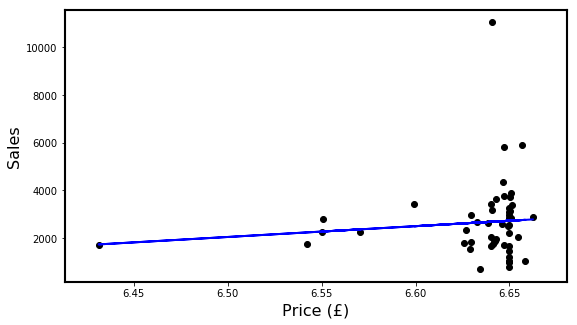

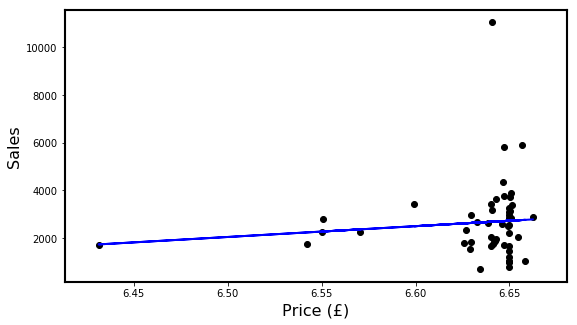

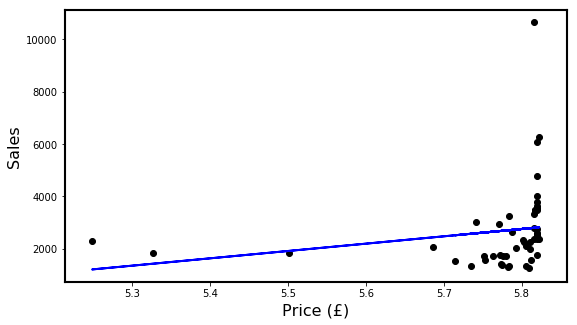

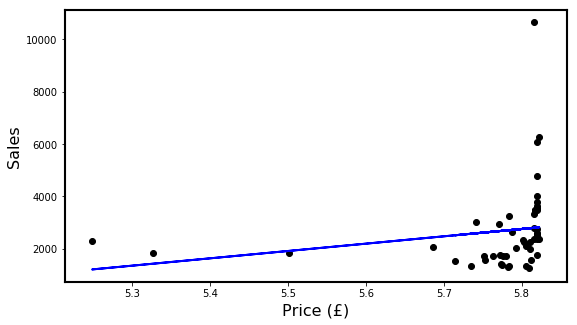

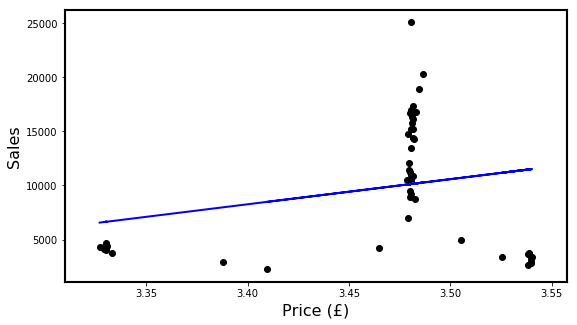

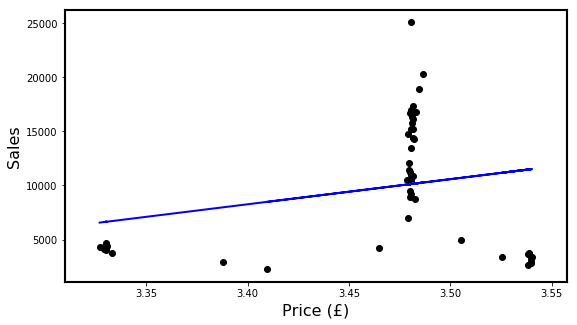

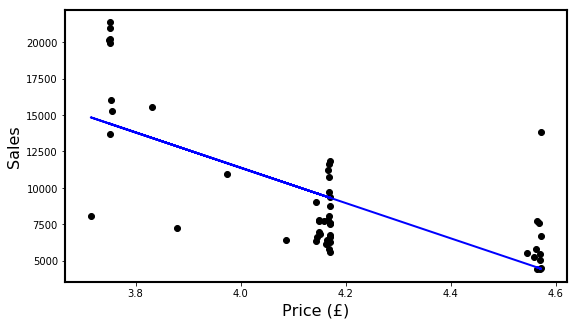

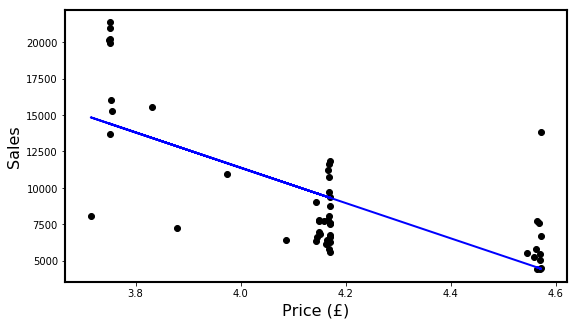

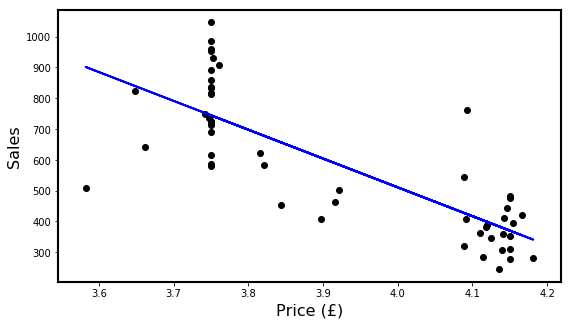

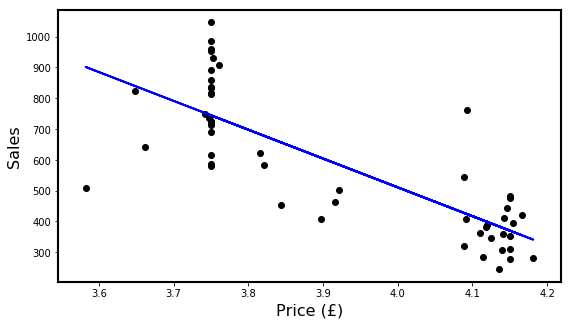

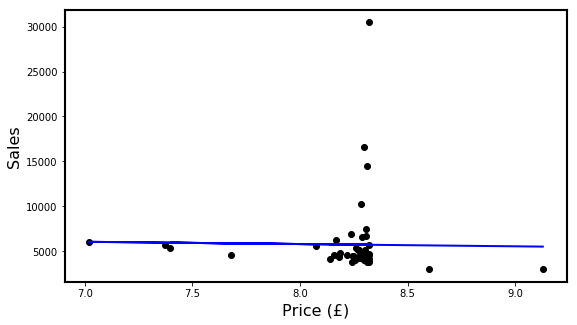

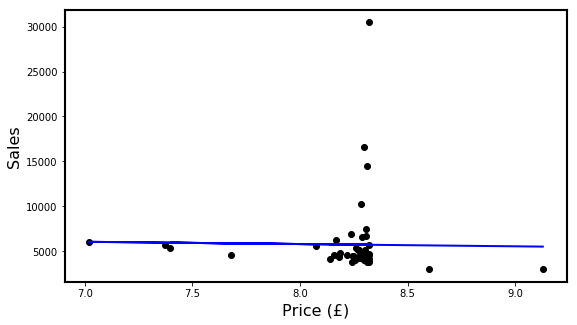

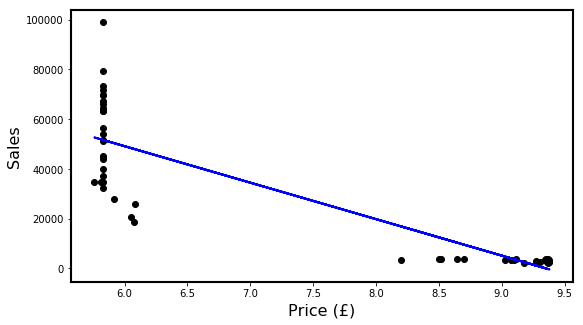

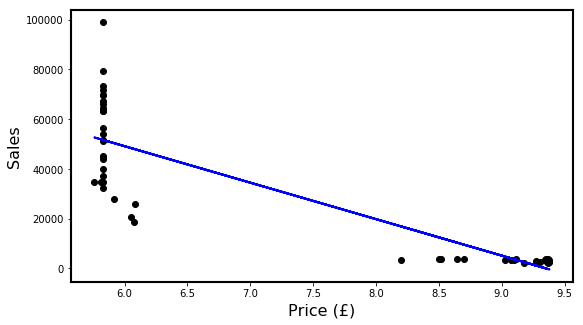

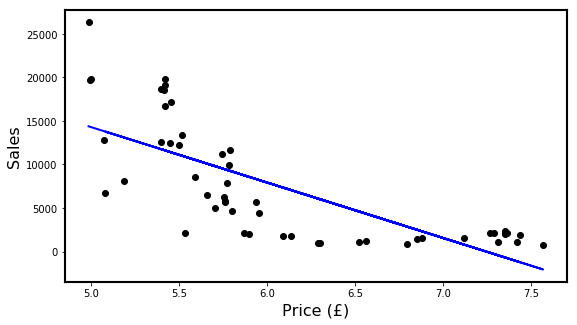

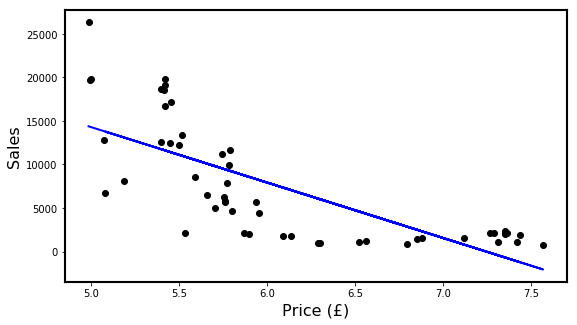

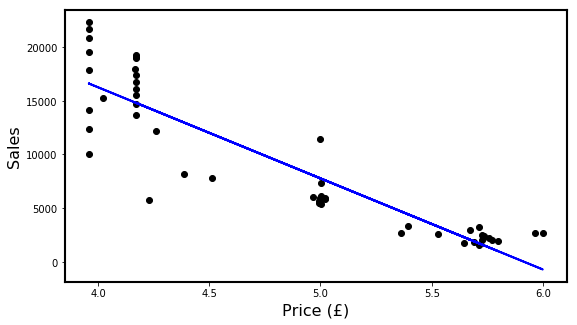

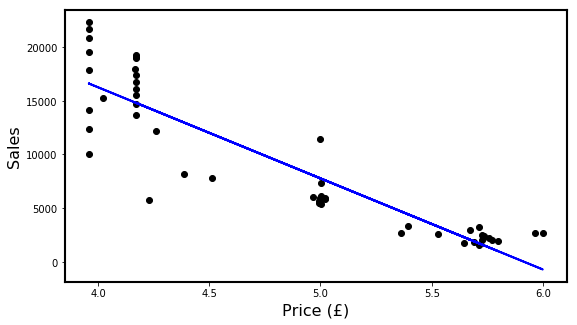

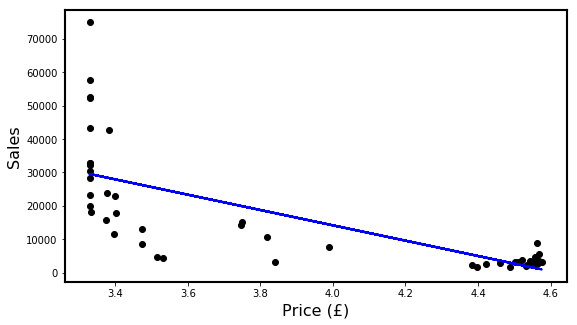

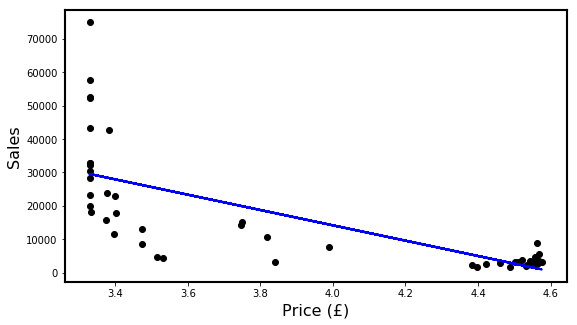

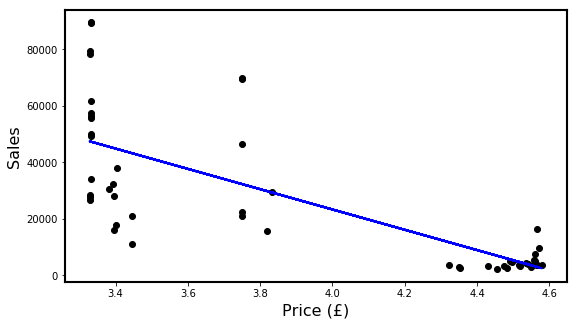

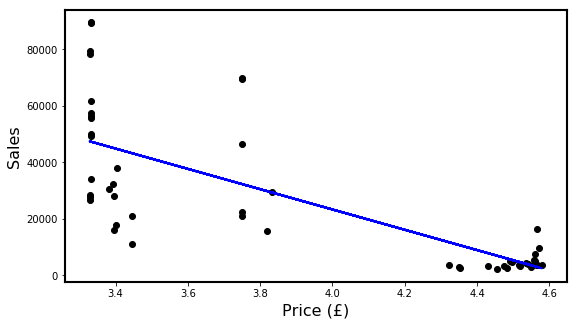

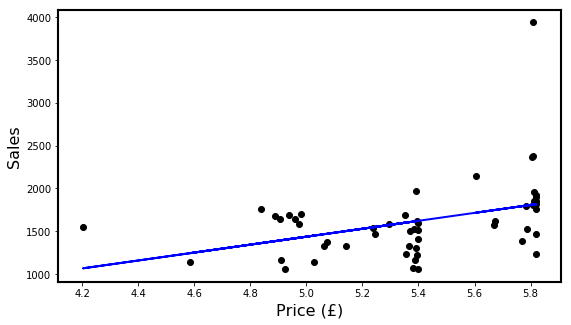

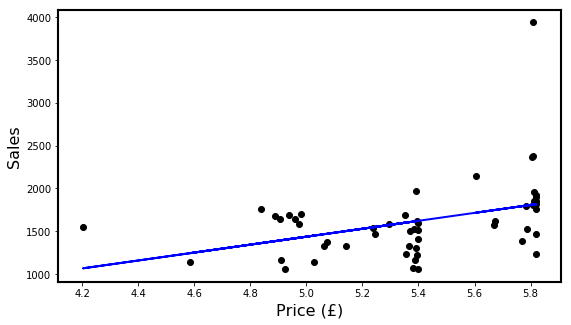

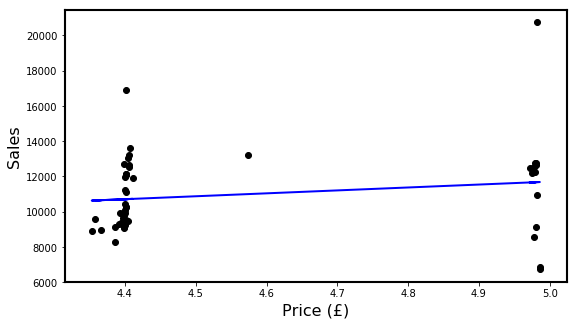

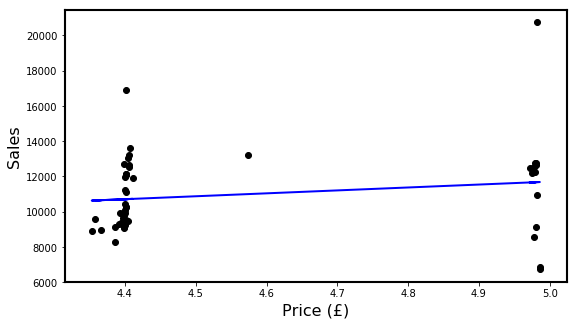

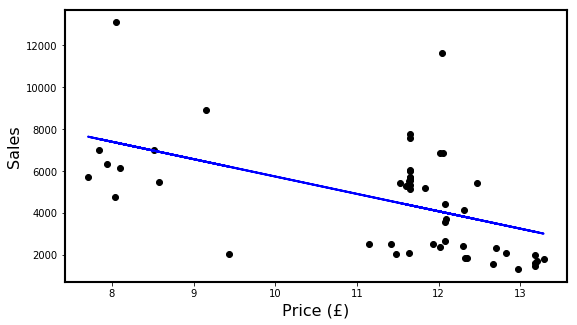

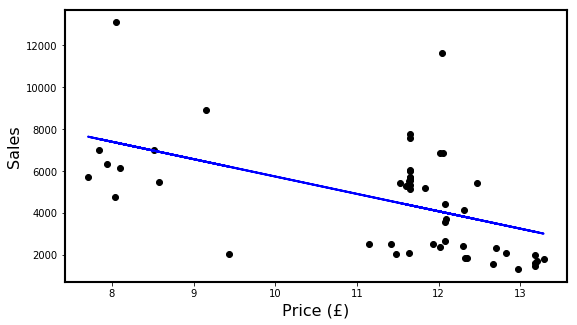

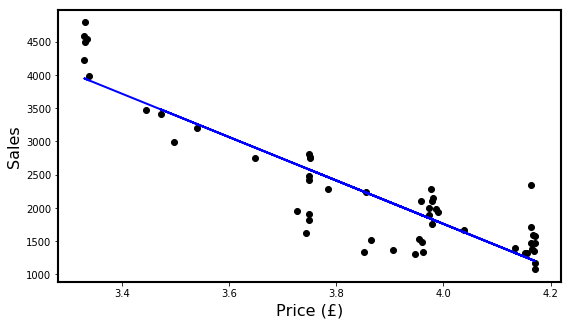

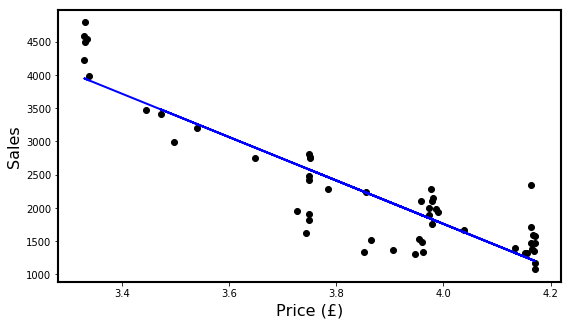

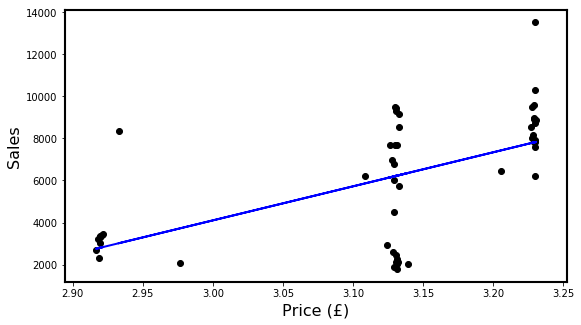

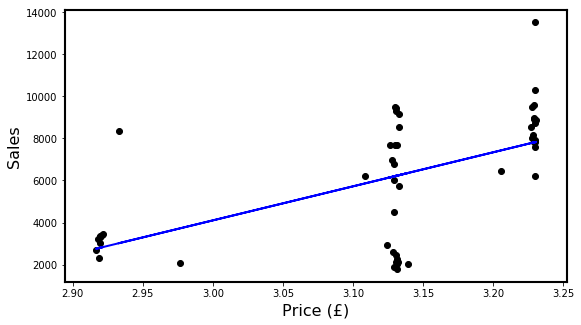

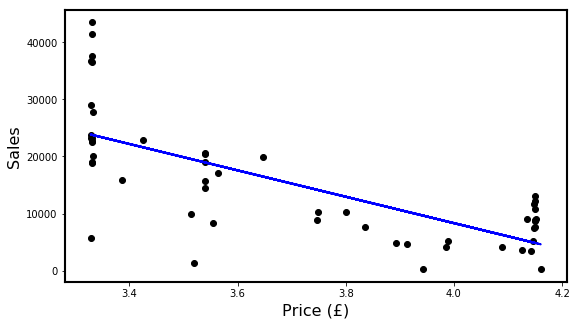

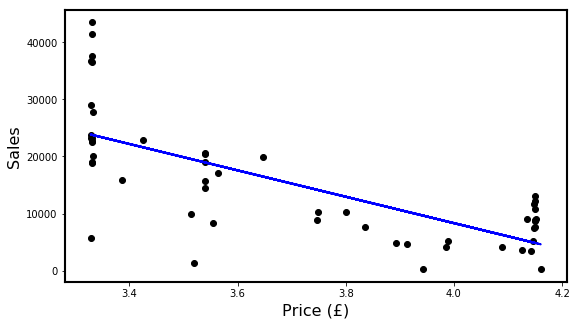

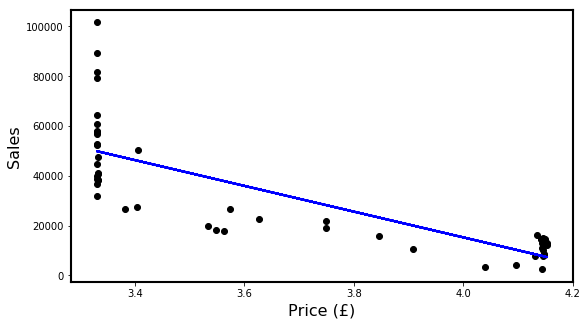

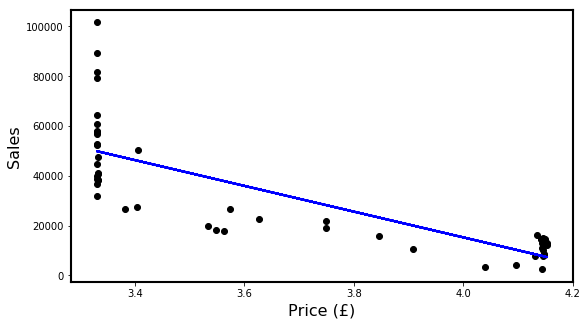

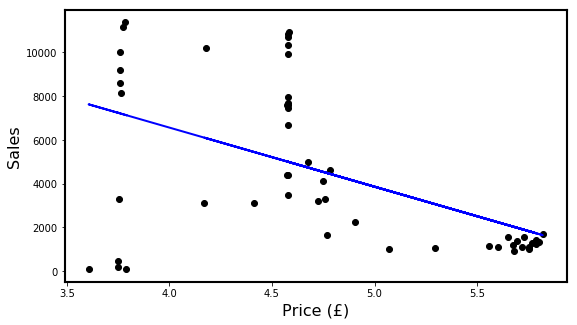

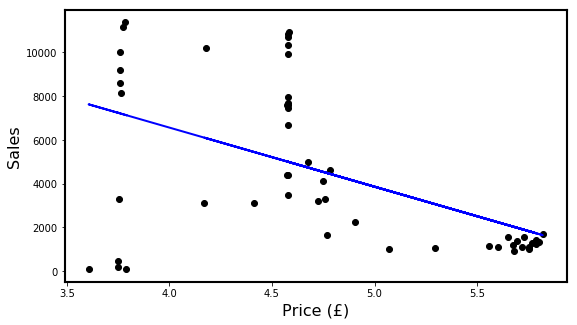

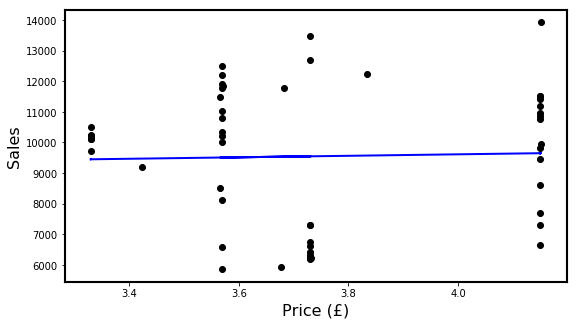

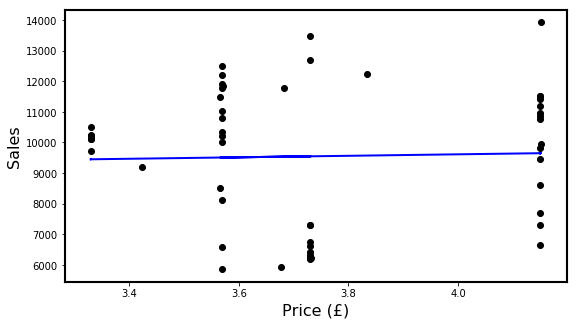

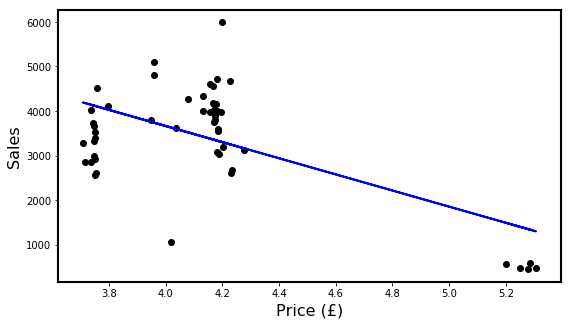

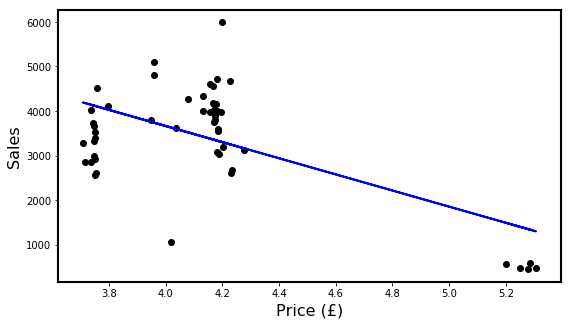

In [43]:
var = []
for product in c_list:
    var.append(linear_reg(price_df_T[product],sales_df_T[product]))
    if (linear_reg(price_df_T[product],sales_df_T[product])) > 0.5:
        print (product)
    
    
    

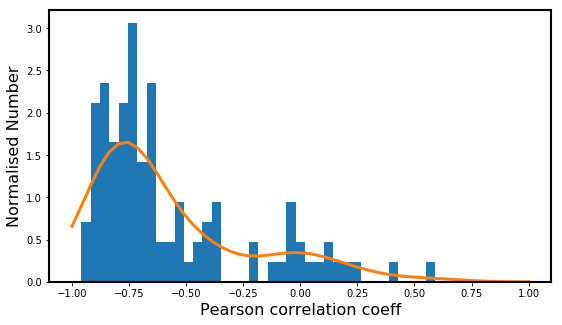

In [28]:


fig,(ax1) = plt.subplots(1,1,figsize=(9,5))
#ax1.hist(var,histtype='stepfilled',density=True)
    
#ax1.plot(sales_df_T.Date, sales_df_T['PRODUCT B'])
#ax1.set_title("Sales (" + product+")",fontsize=24, loc='left')
ax1.set_xlabel("Pearson correlation coeff",fontsize=16)
ax1.set_ylabel("Normalised Number",fontsize=16)

import scipy.stats as stats

density = stats.gaussian_kde(var)
n, x, _ = ax1.hist(var, bins=np.linspace(-1, 1, 50), density=True)  
ax1.plot(x, density(x), linewidth =3)


axes = fig.get_axes()
for ax in axes:
    [i.set_linewidth(2.1) for i in ax.spines.values()]
pylab.savefig('hist.png', bbox_inches=0)

In [29]:
sales_df_T

,PRODUCT A,PRODUCT B,PRODUCT C,PRODUCT D,PRODUCT E,PRODUCT F,PRODUCT G,PRODUCT H,PRODUCT I,PRODUCT J,...,PRODUCT SSSS,PRODUCT TTTT,PRODUCT UUUU,PRODUCT VVVV,PRODUCT WWWW,PRODUCT XXXX,PRODUCT YYYY,PRODUCT ZZZZ,Year_Week,Date
0,12398.45,6931.45,5174.89,10614.77,4538.17,5058.13,5336.59,34732.19,4941.56,16083.25,...,5417.30,3985.36,3337.36,9841.91,18394.99,1173.24,9714.15,3731.21,201652,2016-12-26
1,12297.41,7489.27,5275.80,11422.36,5331.51,6310.83,5649.14,37241.21,2331.31,19644.37,...,5516.28,4537.57,3216.10,18791.40,31845.66,1214.30,10123.80,581.56,201701,2017-01-02
2,12091.36,8038.86,5358.91,24629.94,4959.26,6112.50,5654.30,35478.01,2028.33,21404.70,...,5696.85,4585.68,3337.29,19069.62,36701.57,1292.42,10510.01,467.37,201702,2017-01-09
3,13106.69,8548.24,12645.99,48976.80,12716.77,5917.50,4764.36,25897.36,2594.36,20710.88,...,7747.25,4790.80,3405.73,22778.68,40637.34,1559.99,10250.37,571.94,201703,2017-01-16
4,11195.32,7063.49,26734.08,57481.83,23981.94,5046.29,1988.61,10734.92,2209.24,13721.68,...,5568.70,4229.34,3468.14,22531.17,38305.26,1114.97,10123.69,466.97,201704,2017-01-23
5,10632.12,6597.79,28702.35,56402.60,26270.96,4627.07,1874.36,11106.97,2427.71,14547.38,...,5999.75,4495.81,3360.12,23297.22,38152.01,908.79,10197.19,443.30,201705,2017-01-30
6,10344.34,7086.50,24135.99,54962.36,24837.99,3168.33,1582.95,10863.55,2303.85,13853.60,...,5650.25,3465.80,3033.12,15892.63,27264.77,2257.26,9198.29,1060.59,201706,2017-02-06
7,7935.20,5992.05,19675.35,47025.39,21181.13,1196.20,1416.72,10801.54,2304.73,13340.04,...,5347.35,2006.15,2706.59,3626.26,7957.99,4379.50,6239.80,2564.58,201707,2017-02-13
8,7001.85,6028.35,19738.08,45672.44,22521.79,836.34,1891.62,11407.08,2435.22,14118.05,...,5568.70,1989.10,2334.77,3375.83,7617.20,4404.82,6274.14,2604.72,201708,2017-02-20
9,7147.02,6101.79,14782.23,32868.20,16420.55,808.88,2832.12,16725.32,2288.93,17248.35,...,6058.00,1754.64,2063.00,4904.47,10648.98,3188.27,6199.63,2929.71,201709,2017-02-27


In [30]:
sales_stack = sales_df_T.drop(['Year_Week','Date'],axis=1).stack(dropna=False)
len(sales_stack)

5408

In [31]:
price_stack = price_df_T.drop(['Year_Week','Date'],axis=1).stack(dropna=False)
len(price_stack)

5408

In [32]:
sales_stack = sales_stack.reset_index()
price_stack = price_stack.reset_index()

In [33]:
sales_stack.head()

,level_0,level_1,0
0,0,PRODUCT A,12398.45
1,0,PRODUCT B,6931.45
2,0,PRODUCT C,5174.89
3,0,PRODUCT D,10614.77
4,0,PRODUCT E,4538.17


In [34]:
price_stack.head()

,level_0,level_1,0
0,0,PRODUCT A,4.977298
1,0,PRODUCT B,4.569183
2,0,PRODUCT C,5.401764
3,0,PRODUCT D,5.336737
4,0,PRODUCT E,5.396159


In [35]:
craig = pd.merge(sales_stack, price_stack, left_index=True, right_index=True)
craig.head(5)

,level_0_x,level_1_x,0_x,level_0_y,level_1_y,0_y
0,0,PRODUCT A,12398.45,0,PRODUCT A,4.977298
1,0,PRODUCT B,6931.45,0,PRODUCT B,4.569183
2,0,PRODUCT C,5174.89,0,PRODUCT C,5.401764
3,0,PRODUCT D,10614.77,0,PRODUCT D,5.336737
4,0,PRODUCT E,4538.17,0,PRODUCT E,5.396159


In [36]:
craig = craig.drop(['level_0_y'],axis=1)
craig = craig.drop(['level_1_y'],axis=1)
craig.columns = ['week','product','sales','price']
craig.head(5)

,week,product,sales,price
0,0,PRODUCT A,12398.45,4.977298
1,0,PRODUCT B,6931.45,4.569183
2,0,PRODUCT C,5174.89,5.401764
3,0,PRODUCT D,10614.77,5.336737
4,0,PRODUCT E,4538.17,5.396159


In [37]:
len(craig)

5408

In [38]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [39]:
from statsmodels.formula.api import ols
# formula = 'BEC ~ EtOH'               # Simple regression
formula = 'sales ~ price + C(product)'  # ANCOVA formula
lm = ols(formula, data = craig)
fit = lm.fit()

print(fit.summary())
#print (fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     80.37
Date:                Tue, 30 Jan 2018   Prob (F-statistic):               0.00
Time:                        22:01:29   Log-Likelihood:                -53304.
No. Observations:                5091   AIC:                         1.068e+05
Df Residuals:                    4986   BIC:                         1.075e+05
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           